In [3]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [15]:
# Import Natural language tool kit library
import nltk

In [16]:
# English stop words
from nltk.corpus import stopwords

In [17]:
# Import Wordnet Lemmatizer
from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer

In [13]:
# Import regular expression
import re

In [18]:
# Import Word Cloud
from wordcloud import WordCloud

In [60]:
# Matplotlib for data visualization
import matplotlib.pyplot as plt

In [19]:
# Os for file directory
import os

In [20]:
#Gensim
import gensim
from gensim.utils import simple_preprocess

In [21]:
# Gensim library for LDA
import gensim.corpora as corpora

In [22]:
from gensim.models import CoherenceModel

In [23]:
# SKlearn
from sklearn.linear_model import LinearRegression

In [24]:
import statsmodels.api as sm

In [77]:
# Import PdfReader library
from PyPDF2 import PdfReader
# PlaintextCorpusReader class to create copus
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [20]:
# Library for date and time
import time
from datetime import datetime

In [21]:
# Json for import list to ChatGPT promt
import json

In [26]:
# Avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Fully display the value
def display_full(x):
    with pd.option_context(
        'display.max_colwidth', None,
        'display.max_rows', None
    ):
        display(x)

In [ ]:
# Import webbrower to open PDF file
import webbrowser

## Load the data

In [160]:
## Load main data
df = pd.read_csv('/Users/hoangle/Documents/Milano-Bicocca_PhD/Data Analysis/Result_sent/ICOdata_Oct11.csv')
df = df.drop(columns = ['Unnamed: 0'],axis=1)

In [1]:
# Latent Dirichlet Allocation

In [147]:
# delete some wp
delete_list

[16,
 17,
 19,
 65,
 80,
 126,
 158,
 165,
 200,
 211,
 242,
 275,
 359,
 364,
 372,
 429,
 451,
 454,
 468,
 479,
 491,
 495,
 532,
 544,
 551,
 570,
 592,
 597,
 598,
 644,
 647,
 657,
 662,
 688,
 726,
 810,
 825,
 830,
 860,
 877,
 884,
 888,
 892,
 900,
 918,
 928,
 946,
 981,
 986,
 995,
 1000,
 1006,
 1013,
 1018,
 1021,
 1042,
 1046,
 1075,
 1102,
 1115,
 1117,
 1120,
 1121,
 1127,
 1132,
 1149,
 1163,
 1177,
 1178,
 1185,
 1188,
 1202,
 1223,
 1224,
 1242,
 1244,
 1253,
 1258,
 1261,
 1264,
 1274,
 1294,
 1299,
 1340,
 1362,
 1387,
 1415,
 1468,
 1479,
 1480,
 1490,
 1502,
 1534,
 1536,
 1559,
 1624,
 1666,
 1692,
 1702,
 1709,
 1723,
 1729,
 1759,
 1770,
 1784,
 1799,
 1807,
 1840,
 1854,
 1861,
 1873,
 1902,
 1918,
 1927,
 1931,
 1939,
 1941,
 1945,
 1950,
 1958,
 1962,
 1991,
 2004,
 2020,
 2047,
 2060,
 2077,
 2091,
 2097,
 2100,
 2117,
 2162,
 2171,
 2176,
 2190,
 2197,
 2200,
 2221,
 2224,
 2276,
 2280,
 2295,
 2298,
 2302,
 2336,
 2342,
 2343,
 2359,
 2384,
 2400,
 2434

In [165]:
df_wp = df[~df['whitepaper_text'].isnull()].reset_index()

In [168]:
df_wp['whitepaper_text'].loc[delete_list]=np.nan

In [169]:
df_wp = df_wp[~df_wp['whitepaper_text'].isnull()].reset_index()

In [ ]:
## Data preprocessing

In [171]:
# Remove punctuation
df_wp['text_processed'] = df_wp['whitepaper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df_wp['text_processed'] = df_wp['text_processed'].map(lambda x: x.lower())

In [172]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = df_wp.text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [ ]:
# Build the bigram and trigram models
#bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
#bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

In [173]:
# NLTK Stop words
stop_words = nltk.corpus.stopwords.words('english')
#stop_words.extend(['use','user','using','also',
#                    'users','able','allow','used','based','provide','offer'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def keep_words(texts):
    corpus = []
    for doc in texts:
        text = nltk.pos_tag(doc)
        tag = []
        # keep nouns only
        for t in text:
            if t[1] in ['NN','NNS','NNP','NNPS']:
                tag.append(t[0])
        # Porter stemmer
        porter = PorterStemmer()
        pStem = [porter.stem(t) for t in tag]
        corpus.append(pStem)
    return corpus

In [174]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
#data_words_bigrams = make_bigrams(data_words_nostops)
# Keep only nouns
data_lemmatized = keep_words(data_words_nostops)

In [175]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Remove extreme words
id2word.filter_extremes(no_below=3, no_above=0.6)
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
## Evaluate the number of topics

In [176]:
# CPMI
def compute_coherence_values(k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_npmi')
    
    return coherence_model_lda.get_coherence()

In [177]:
# Calculate CPMI for 8-50 topics
k=8
c_npmi = []
while k<42:
    print(k)
    a = compute_coherence_values(k)
    c_npmi.append(a)
    print(a)
    k=k+1

8
0.021364027636584043
9
0.009108510672070044
10
0.050767164609574825
11
0.037455054957526185
12
0.03469844710910882
13
0.011652704601351153
14
0.04542024707004945
15
0.05101376030719919
16
0.025375312518194564
17
0.03245108990762381
18
0.030148837557848654
19
0.030678662920707894
20
0.022659331405177292
21
0.03803437709991538
22
0.03226065267755363
23
0.03095414805981418
24
0.03777083538922708
25
0.024488694873018232
26
0.026038024323338325
27
0.009795061387376762
28
0.014066942981693123
29
0.006332593728928183
30
0.024493008979895536
31
0.020050250949977616
32
0.02678977209869684
33
0.025958136148559244
34
0.026040570172831397
35
0.027457108938483774
36
0.011971952863651943
37
0.010296956676859407
38
0.011459782040167892
39
0.02384610571196289
40
0.007689407203282132
41
0.025472539757264216


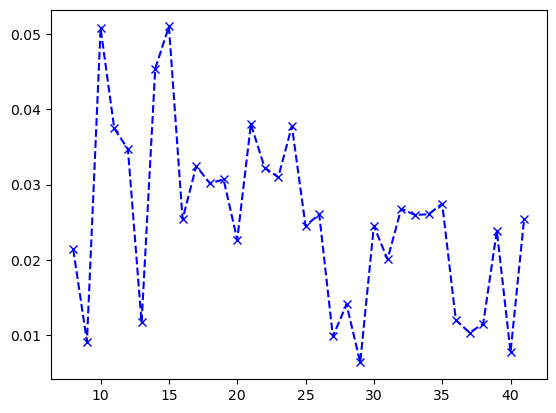

In [178]:
# Graph of CPMI
plt.plot(range(8,42),c_npmi, color = 'blue',marker = 'x', linestyle='--')

In [180]:
# LDA model for number of topics k=30
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=15, 
                                        random_state=100,
                                        chunksize=100,
                                        passes=10)

In [192]:
# print the topics 
a = lda_model.print_topics(num_topics = 15, num_words = 400)

In [193]:
a

[(0,
  '0.020*"job" + 0.016*"student" + 0.016*"music" + 0.013*"univers" + 0.012*"freelanc" + 0.012*"educ" + 0.010*"employ" + 0.010*"skill" + 0.008*"cours" + 0.007*"employe" + 0.007*"colleg" + 0.006*"talent" + 0.006*"artist" + 0.006*"candid" + 0.006*"task" + 0.006*"review" + 0.006*"copyright" + 0.005*"recruit" + 0.005*"profil" + 0.005*"worker" + 0.005*"institut" + 0.005*"knowledg" + 0.005*"organ" + 0.004*"economi" + 0.004*"school" + 0.004*"qualiti" + 0.004*"pool" + 0.004*"certif" + 0.004*"trust" + 0.004*"record" + 0.004*"profession" + 0.004*"scienc" + 0.003*"disput" + 0.003*"contribut" + 0.003*"area" + 0.003*"studi" + 0.003*"agenc" + 0.003*"expert" + 0.003*"consult" + 0.003*"career" + 0.003*"teacher" + 0.003*"idea" + 0.003*"core" + 0.003*"vision" + 0.003*"reserv" + 0.003*"role" + 0.003*"mechan" + 0.003*"effort" + 0.002*"posit" + 0.002*"vote" + 0.002*"databas" + 0.002*"faculti" + 0.002*"today" + 0.002*"contact" + 0.002*"collabor" + 0.002*"releas" + 0.002*"life" + 0.002*"contributor" + 0.

In [69]:
### Comput words distribution of each topic

In [195]:
wordlist = []
for i in range(0,15):
    sublist = []
    for j in a[i][1].split(' + '):
        x = float(j.split('*')[0])
        y = j.split('*')[1][1:-1]
        sublist.append([x,y])
    wordlist.append(sublist)

In [198]:
Distri = []
for i in range(0,len(wordlist)):
    subdistri = []
    total = 0
    for k in  wordlist[i]:
        total = total+k[0]
    for j in wordlist[i]:
        x = j[0]/total
        y = j[1]
        subdistri.append([x,y])
    Distri.append(subdistri)

In [78]:
### Import 'Managing Innovation' textbook
# Function for get texts from PDF files
def getTextPDF(pdfFileName):
    pdf_file = open(pdfFileName, 'rb')
    read_pdf = PdfReader(pdf_file)
    return read_pdf

# Load the texbook
textbook_filename = '/Users/hoangle/Documents/Milano-Bicocca_PhD/Innovation-textbook/Managing Innovation Integrating Technological.pdf'
textbook = getTextPDF(textbook_filename)

textbook_text = ''
for i in range(0,len(textbook.pages)):
    text = textbook.pages[i].extract_text()
    textbook_text = textbook_text + '\n ' + text

# Tokenize textbook
textbook_token = nltk.word_tokenize(textbook_text)

# Porter stemmer
porter = PorterStemmer()
textbook_porter = [porter.stem(t) for t in textbook_token]

# Remove stop words
stopwords = nltk.corpus.stopwords.words('english')
dist = nltk.FreqDist(w.lower() for w in textbook_porter if w not in stopwords and len(w)>1)

In [199]:
## Match textbook words with each topic words
Dis_textbook = []
for topic_word in Distri:
    Dis_textbook1 = []
    for j in topic_word:
        x=dist[j[1]]
        y=j[1]
        Dis_textbook1.append([x,y])
    Dis_textbook.append(Dis_textbook1)

In [200]:
# Estimate (discrete) distribution of textbook-topic-matched words
Distri_textbook = []
for i in range(0,len(Dis_textbook)):
    subdistri_textbook = []
    total = 0
    for k in  Dis_textbook[i]:
        total = total+k[0]
    for j in Dis_textbook[i]:
        x = j[0]/total
        y = j[1]
        subdistri_textbook.append([x,y])
    Distri_textbook.append(subdistri_textbook)

In [201]:
# Calculate the KL divergence
KL_diver = []
for i in range(0,len(Distri_textbook)):
    x = 0
    for j in range(0,100):
        if Distri_textbook[i][j][0]>0 and Distri[i][j][0]>0:
            ratio = Distri[i][j][0]*(np.log(Distri[i][j][0]/Distri_textbook[i][j][0]))
            x = x+ ratio
    KL_diver.append(x)

In [207]:
KL_diver

[0.8222745299857794,
 1.0527480930583288,
 1.3380954436421273,
 0.15711979476117657,
 1.2451414004848629,
 0.8585668980375001,
 0.8518804375120346,
 1.283727319081829,
 0.770854711057196,
 1.0138213738508821,
 0.6692248358492737,
 1.1305744163970963,
 1.1457603873978088,
 1.1033389335836774,
 1.3511744722962373]

In [ ]:
# Topics that have lowest KL convergence is 3 (count from 0) but Topic 3 contains many typos
# that makes the non-typos becomes major
#=> Topic 10 has the lowest KL convergence to the textbook terms

In [227]:
a[3]

(3,
 '0.042*"pg" + 0.030*"boe" + 0.024*"jo" + 0.021*"remitt" + 0.018*"wealth" + 0.016*"gp" + 0.015*"migrat" + 0.012*"jt" + 0.010*"qmbugpsn" + 0.010*"po" + 0.010*"cf" + 0.009*"xjmm" + 0.008*"bsf" + 0.008*"ctf" + 0.008*"immigr" + 0.008*"ps" + 0.008*"adult" + 0.008*"xjui" + 0.007*"bt" + 0.007*"cz" + 0.006*"dbo" + 0.006*"reit" + 0.006*"ofth" + 0.005*"bitx" + 0.005*"migrant" + 0.005*"gspn" + 0.005*"mm" + 0.005*"jp" + 0.004*"benchmark" + 0.004*"plfo" + 0.004*"opu" + 0.004*"bankera" + 0.004*"aml" + 0.004*"clear" + 0.004*"orang" + 0.004*"bdujwjujft" + 0.004*"yield" + 0.004*"rm" + 0.004*"px" + 0.003*"kyc" + 0.003*"complianc" + 0.003*"robo" + 0.003*"tfc" + 0.003*"sentiment" + 0.003*"shyft" + 0.003*"jogsbtusvduvsf" + 0.003*"tap" + 0.003*"portfolio" + 0.003*"xf" + 0.003*"traxion" + 0.003*"bo" + 0.003*"ju" + 0.003*"philippin" + 0.003*"ibwf" + 0.003*"helix" + 0.003*"qpxf" + 0.003*"bu" + 0.003*"pocket" + 0.003*"vtf" + 0.003*"cmpdldibjo" + 0.003*"bamboo" + 0.003*"hedg" + 0.003*"orca" + 0.003*"toth" + 

In [222]:
Distri_textbook[3]

[[0.0, 'pg'],
 [0.023868312757201648, 'boe'],
 [0.0, 'jo'],
 [0.0, 'remitt'],
 [0.0205761316872428, 'wealth'],
 [0.0016460905349794238, 'gp'],
 [0.006584362139917695, 'migrat'],
 [0.0, 'jt'],
 [0.0, 'qmbugpsn'],
 [0.006584362139917695, 'po'],
 [0.0016460905349794238, 'cf'],
 [0.0, 'xjmm'],
 [0.0, 'bsf'],
 [0.0, 'ctf'],
 [0.0, 'immigr'],
 [0.0016460905349794238, 'ps'],
 [0.0016460905349794238, 'adult'],
 [0.0, 'xjui'],
 [0.0049382716049382715, 'bt'],
 [0.0, 'cz'],
 [0.0, 'dbo'],
 [0.0, 'reit'],
 [0.0, 'ofth'],
 [0.0, 'bitx'],
 [0.0, 'migrant'],
 [0.0, 'gspn'],
 [0.0016460905349794238, 'mm'],
 [0.0, 'jp'],
 [0.03950617283950617, 'benchmark'],
 [0.0, 'plfo'],
 [0.0, 'opu'],
 [0.0, 'bankera'],
 [0.0, 'aml'],
 [0.17037037037037037, 'clear'],
 [0.0008230452674897119, 'orang'],
 [0.0, 'bdujwjujft'],
 [0.011522633744855968, 'yield'],
 [0.0, 'rm'],
 [0.0, 'px'],
 [0.0, 'kyc'],
 [0.00905349794238683, 'complianc'],
 [0.0, 'robo'],
 [0.0, 'tfc'],
 [0.0016460905349794238, 'sentiment'],
 [0.0, 'shyf

In [236]:
Distri_textbook[10]

[[0.0, 'trader'],
 [0.0, 'bitcoin'],
 [0.0006993006993006993, 'block'],
 [0.00017482517482517483, 'liquid'],
 [0.0006643356643356643, 'volum'],
 [0.012657342657342658, 'tion'],
 [0.0025524475524475523, 'machin'],
 [0.0, 'btc'],
 [0.0, 'masternod'],
 [0.006013986013986014, 'analysi'],
 [0.001013986013986014, 'interfac'],
 [0.00024475524475524476, 'algorithm'],
 [0.003951048951048951, 'balanc'],
 [0.0005244755244755245, 'pool'],
 [0.0017482517482517483, 'step'],
 [0.0005594405594405594, 'page'],
 [0.001013986013986014, 'languag'],
 [0.005874125874125874, 'figur'],
 [0.00017482517482517483, 'protocol'],
 [0.006293706293706294, 'limit'],
 [3.4965034965034965e-05, 'deposit'],
 [6.993006993006993e-05, 'api'],
 [0.001013986013986014, 'index'],
 [0.0024125874125874125, 'predict'],
 [0.00013986013986013986, 'cap'],
 [0.0003146853146853147, 'code'],
 [0.002972027972027972, 'portfolio'],
 [0.0001048951048951049, 'withdraw'],
 [0.0006293706293706294, 'round'],
 [0.0005944055944055944, 'server'],
 

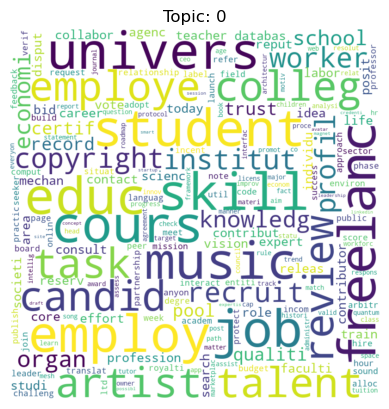

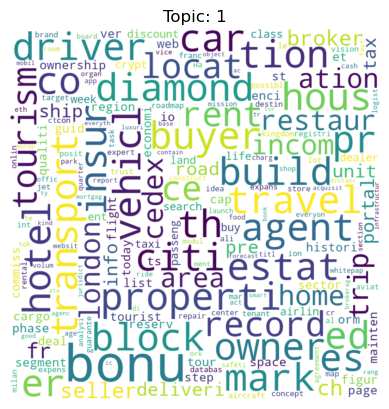

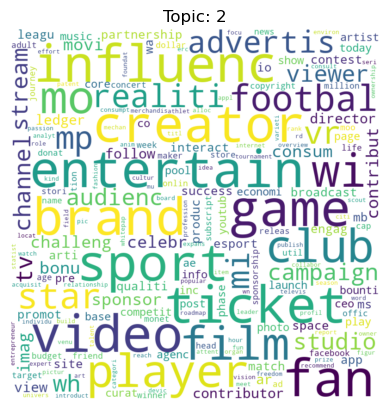

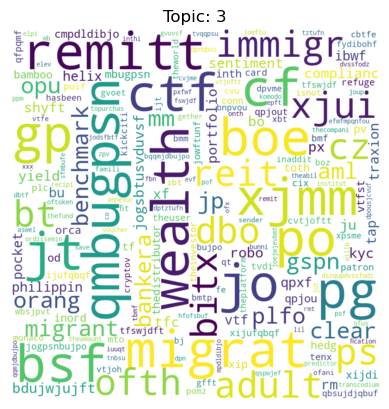

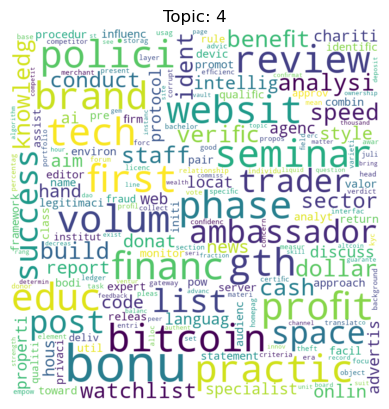

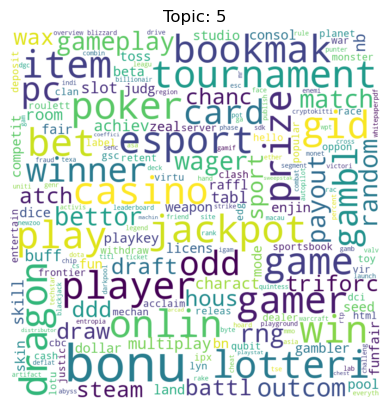

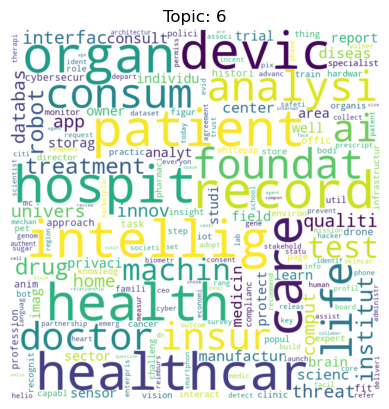

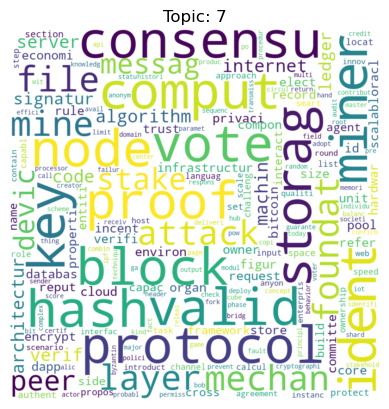

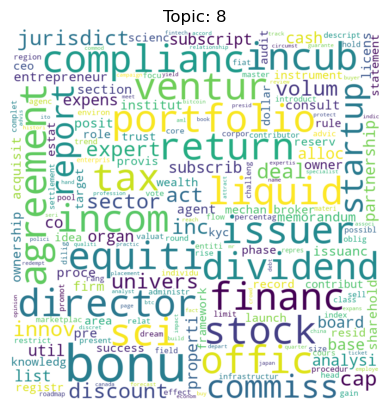

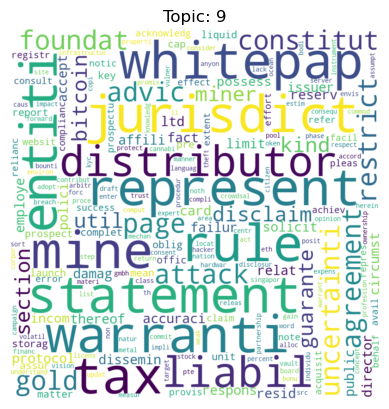

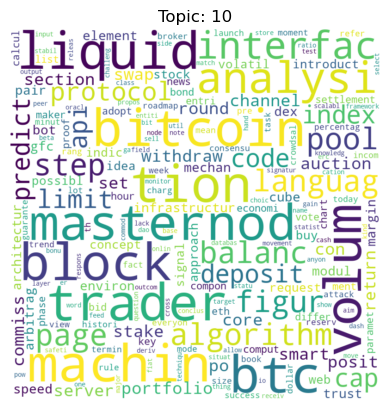

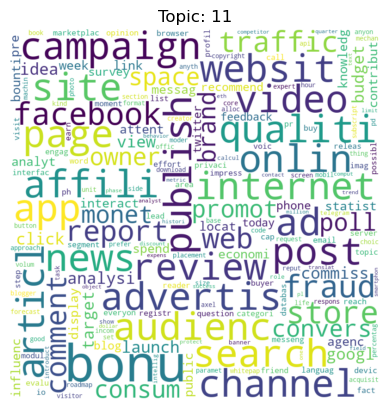

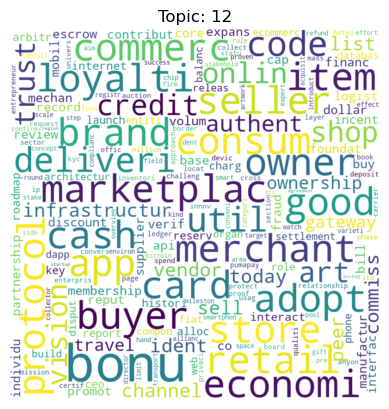

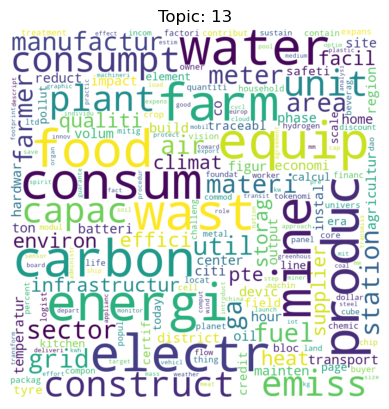

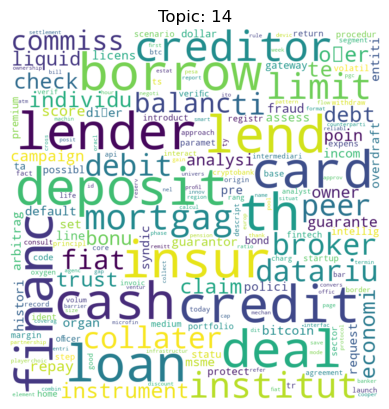

In [211]:
# List all topics wordcloud
for topic_id, topic in enumerate(a):
    topic_words = ''.join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110, background_color="white", contour_width=3, contour_color='steelblue').generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

In [243]:
# Create variables for the whitepapers that cover topic 10
df_wp['KL_topic']=0
## Print whitepaper that cover topic 18
p=0
for i in range(0,len(df_wp)):
    topiclist=[]
    for j in lda_model[corpus[i]]:
        topiclist.append(j[0])
    if 10 in topiclist:
        print(i,' --- ',df_wp['name'].loc[i])
        df_wp['KL_topic'].loc[i]=1
        p=p+1
print('------')
print("total: ",p,' whitepapers')

0  ---  WINSSHI
2  ---  PointPay
4  ---  Hashbon
5  ---  MetaHash
6  ---  2GETHER
8  ---  SaTT
9  ---  Hoard
10  ---  KardiaChain
11  ---  MADANA
14  ---  Attrace
16  ---  GEMERA
18  ---  HyperionX
19  ---  Infleum
20  ---  KuBitX
21  ---  Liquid8
22  ---  Loligo
23  ---  LOVE Air Coffee
26  ---  QuickX Protocol
28  ---  Uris
29  ---  Anything App
31  ---  Big Data Block
35  ---  FarmaTrust
37  ---  HyperQuant
42  ---  Railz
43  ---  Scienceroot
44  ---  SOMESING
51  ---  DeNet
52  ---  DYNO
53  ---  Ellcrys
57  ---  GoRecruit
58  ---  IdeaFeX
59  ---  MIMIC
62  ---  Qobit
66  ---  X-Block
67  ---  Zeon Network
70  ---  Bitacium
71  ---  Bulltoken
72  ---  Caloriecoin
73  ---  Casper API
76  ---  CrypStock
80  ---  Homelend
81  ---  Ligercoin
82  ---  Liqnet
85  ---  Nafen
87  ---  Plentix
88  ---  PrepayWay
89  ---  PRIMARY
90  ---  RYFTS
91  ---  Safein
92  ---  Sportcash One
93  ---  Talenthon
94  ---  Teambrella
96  ---  Universal Recognition Token
97  ---  Your Data Safe
98  ---  

790  ---  Paymon
792  ---  Photochain
793  ---  Pool of Stake
794  ---  Productivist
796  ---  PROOF OF TOSS
797  ---  Quant Network
798  ---  Qurrex
799  ---  RainCheck
800  ---  Rento
802  ---  Safe Haven
804  ---  ShareRing
807  ---  Slate
809  ---  Streamex
811  ---  SyncFab
812  ---  TalentSnap
813  ---  Taurus0X
815  ---  Telluria
816  ---  TEMCO
818  ---  Tip Blockchain
819  ---  Tokenaire
820  ---  TokenStars TEAM
821  ---  Tradelize
822  ---  Treon
823  ---  TV-TWO
824  ---  Twogap
827  ---  Utile Network
828  ---  UTIX
831  ---  VegaWallet
832  ---  Vernam
833  ---  Vertex
835  ---  Vikky
836  ---  Virtuse Exchange
838  ---  VTOS
839  ---  Wellmee
841  ---  XchangeRate
842  ---  XInfinity
844  ---  Yamzu
847  ---  Zodiaq
848  ---  aGifttoken Stage I
849  ---  BGX
850  ---  Biogen
851  ---  Bitbose
852  ---  Bitozz
853  ---  Blinked
856  ---  Bubbletone
857  ---  CCUniverse UVU
858  ---  CDRX
859  ---  CMC
860  ---  Coin Analyst
861  ---  Coinet
862  ---  CRESIO
863  ---  Cryp

1566  ---  Alt Planet
1568  ---  AmaStar
1573  ---  BANKEX
1575  ---  BitCar
1577  ---  Bitone Network
1579  ---  BrikBit
1580  ---  Bryllite
1581  ---  Bulk Trader
1584  ---  CitiCash
1586  ---  Coinnup
1589  ---  Cosmochain
1590  ---  CriptoHub
1592  ---  Cryde
1594  ---  Current
1595  ---  DogRacing
1598  ---  Enecuum
1599  ---  EveryCoin
1600  ---  FAIMA
1601  ---  Fern
1605  ---  GCBIB
1607  ---  GlobalCarService
1610  ---  HomeMine
1614  ---  InterValue
1615  ---  intimate
1617  ---  IUNO
1618  ---  Jincor
1619  ---  Karuna Network
1620  ---  Knowledge
1622  ---  KredX
1623  ---  Lamoneda
1624  ---  Leverj
1633  ---  OLXA
1634  ---  OmiseGO
1638  ---  PentaCore
1641  ---  Plasmium
1642  ---  Playrs
1644  ---  Poins
1645  ---  ProKareX
1646  ---  Pumpkin
1648  ---  RefToken
1650  ---  Request Network
1654  ---  Scam ICO Killer
1655  ---  Scanetchain
1657  ---  Skraps
1658  ---  Smart Valley
1661  ---  SophiaTX
1662  ---  Spectiv
1666  ---  Tezos
1667  ---  TrakInvest
1669  ---  VE

2295  ---  SESSIA
2296  ---  Zeux
2297  ---  ESAX
2298  ---  CYBR
2299  ---  IZIChain
2300  ---  Dos Network
2303  ---  Mycro
2309  ---  DUO Network
2312  ---  PixelBit
2313  ---  Membrana
2314  ---  V Systems
2317  ---  MEvU
2319  ---  Global Funeral Care
2320  ---  Coinxes
2322  ---  GStar
2324  ---  Cube Chain
2326  ---  Smart Trade Coin
2331  ---  Viaz
2334  ---  Swace
2335  ---  Bither
2336  ---  Betmatch
2337  ---  MarketC
2341  ---  Uncloak
2343  ---  TranslateMe
2344  ---  Azultec
2347  ---  Thundercore
2353  ---  Faireum
2355  ---  Green Funding Coin
2356  ---  WeGen
2359  ---  Dusk Network
2362  ---  1WorldBlockchain
2363  ---  PlutusX
2364  ---  ShipNEXT
2367  ---  Cyber Capital Invest
2368  ---  Oxygen Trade
2372  ---  UNCHAINET
2373  ---  Usereum
2376  ---  NnBU
2378  ---  AsicVault
2379  ---  Boule
2380  ---  ODIN Token
2381  ---  CoinPayo
2384  ---  ZenithCard
2385  ---  Gigzi
2386  ---  SANUSCOIN
2387  ---  Luckchemy
2388  ---  Jinbi Token
2391  ---  Noku
2392  ---  Blo

In [ ]:
# Open the whitepaper in the default PDF reader app
i=15
webbrowser.open_new('file:///Users/hoangle/Desktop/Cryptototem/'+ df_wp['name'].loc[i] + '.pdf')

In [ ]:
## OLS regression

In [214]:
# Dependent variable ln(1+amount-raised)
df_wp['Y'] = np.log(df_wp['raised_usd']+1)

In [215]:
# Independent variable (whether the whitepaper includes topic 10)
X = np.array(df_wp[df_wp['Y']>0]['KL_topic']).reshape(-1, 1)

In [216]:
y = np.array(df_wp[df_wp['Y']>0]['Y']).reshape(-1, 1)

In [218]:
# Statistic Description
df_wp[df_wp['Y']>0]['KL_topic'].value_counts()

KL_topic
1    665
0    466
Name: count, dtype: int64

In [217]:
# OLS model
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.718
Date:                Thu, 12 Oct 2023   Prob (F-statistic):            0.00556
Time:                        00:07:34   Log-Likelihood:                -2302.3
No. Observations:                1131   AIC:                             4609.
Df Residuals:                    1129   BIC:                             4619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3656      0.086    178.873      0.0

# Incremetal and radical innovation

In [237]:
# Function for calculate the superlative terms
def superlative(x):
    word = nltk.word_tokenize(x)
    token = nltk.pos_tag(word)
    count = 0
    sup_word = []
    for i in token:
        if i[1] in ['JJS','RBS'] and i[0] not in ['least','latest']:
            sup_word.append(i)
            count = count + 1
    return count     

In [238]:
# Function for calculate the comparative terms
def comparative(x):
    word = nltk.word_tokenize(x)
    token = nltk.pos_tag(word)
    count = 0
    com_word = []
    for i in token:
        if i[1] in ['JJR','RBR']:
            com_word.append(i)
            count = count + 1
    return count     

In [248]:
# List of terms representing incremental innovativeness
incre_list=['advance','improve','refine','surpass','upgrad', 'strengthen','modif','divers','enrich','reduc','enhance','tuning','updat','adap','adjust','next generation','next-generation','new generation','new-generation','expand','competi']

In [249]:
# List of terms representing radical innovativeness
rad_list = ['breakth', 'break-th','brand new','brand-new','redefin','re-defin','totally new','unpreceden','new way','new dimension','new starting point','rebirth','pioneer','reform','reconstruct','re-construct','discover','game-chang','game chang','ground break','ground-break','novel','disrup','invention','cutting-edge','cutting edge','miracul','miracle','major change', 'world chang','world-change','new journey','originate','totally new technology','future technology','new concept','new era','new way','world’s first','world’s best']

In [250]:
#df['radical_wordcount'] = 0
#df['radical_wordcount2'] = 0
#df['wp_wordcount']=np.nan

In [252]:
c=0
for n in range(0,len(df)):
    if type(df['whitepaper_text'].loc[n])==str:
        b=0
# match and count words that starts with the terms included in the list
        for i in rad_list:
            match = r'\b'+i+r'\w*'
            a = len(re.findall(match,df['whitepaper_text'].loc[n].lower()))
            b = b+a
            if a >0:
                print(i, '----',a)
# count the superlative terms
        sup_count = superlative(df['whitepaper_text'].loc[n])
        print('superlative',sup_count)
        df['radical_wordcount2'].loc[n]=b*2+sup_count
        b = b+sup_count
        if b>0:
            print(n, '---',df['name'].loc[n], '-----', b)
            print('\n\n\n')
            c=c+1
        df['radical_wordcount'].loc[n]=b
print(c)

superlative 2
0 --- WINSSHI ----- 2




redefin ---- 1
disrup ---- 2
superlative 8
2 --- Mindsync ----- 11




superlative 5
3 --- PointPay ----- 5




new way ---- 1
discover ---- 5
disrup ---- 2
new way ---- 1
world’s first ---- 1
superlative 18
5 --- Emanate ----- 28




cutting-edge ---- 2
world’s first ---- 1
superlative 8
6 --- Hashbon ----- 11




discover ---- 1
disrup ---- 1
invention ---- 1
superlative 29
7 --- MetaHash ----- 32




disrup ---- 2
superlative 19
8 --- 2GETHER ----- 21




disrup ---- 1
superlative 6
9 --- Coinimp ----- 7




superlative 14
10 --- SaTT ----- 14




unpreceden ---- 1
new way ---- 1
discover ---- 2
novel ---- 1
disrup ---- 2
cutting-edge ---- 1
cutting edge ---- 2
new way ---- 1
superlative 14
13 --- Hoard ----- 25




discover ---- 1
superlative 4
14 --- KardiaChain ----- 5




new way ---- 1
pioneer ---- 2
reform ---- 1
novel ---- 3
disrup ---- 1
cutting edge ---- 1
major change ---- 1
originate ---- 1
new era ---- 1
new way ---- 1
superlative 

superlative 20
182 --- Benchmark ----- 25




redefin ---- 1
superlative 12
187 --- CryptovationX ----- 13




superlative 0
pioneer ---- 1
discover ---- 1
novel ---- 1
superlative 22
191 --- Elements Estates ----- 25




breakth ---- 1
redefin ---- 1
unpreceden ---- 2
invention ---- 1
superlative 13
193 --- Extauri ----- 18




superlative 13
195 --- Gamedex ----- 13




new way ---- 1
new way ---- 1
superlative 1
196 --- Gimmer ----- 3




superlative 19
197 --- GladAge ----- 19




disrup ---- 1
superlative 0
199 --- Hala ----- 1




unpreceden ---- 1
discover ---- 2
superlative 22
200 --- Holdvest ----- 25




new dimension ---- 2
pioneer ---- 1
reform ---- 1
discover ---- 3
novel ---- 1
disrup ---- 1
originate ---- 1
superlative 51
206 --- JUR ----- 61




discover ---- 1
disrup ---- 6
world’s first ---- 3
superlative 32
208 --- Nexxo ----- 42




unpreceden ---- 1
new way ---- 2
discover ---- 11
novel ---- 1
disrup ---- 7
cutting-edge ---- 1
new era ---- 6
new way ---- 2
superlat

superlative 10
394 --- TowerBee ----- 14




unpreceden ---- 1
new way ---- 1
reconstruct ---- 1
novel ---- 1
major change ---- 1
new way ---- 1
superlative 1
395 --- Twilight ----- 7




breakth ---- 2
new way ---- 2
pioneer ---- 5
discover ---- 1
novel ---- 3
new way ---- 2
world’s first ---- 1
superlative 30
397 --- Universal Protocol ----- 46




redefin ---- 1
new way ---- 1
disrup ---- 3
new era ---- 1
new way ---- 1
superlative 28
398 --- Universal Reward Protocol ----- 35




novel ---- 1
superlative 8
402 --- WinStars ----- 9




breakth ---- 1
reform ---- 1
cutting edge ---- 1
superlative 7
403 --- XendBit ----- 10




superlative 0
breakth ---- 2
cutting edge ---- 1
superlative 0
408 --- aelf ----- 3




superlative 6
412 --- ArchiCoin ----- 6




breakth ---- 1
new way ---- 1
pioneer ---- 2
discover ---- 2
new way ---- 1
world’s first ---- 1
superlative 30
413 --- Arianee ----- 38




breakth ---- 2
redefin ---- 1
pioneer ---- 1
discover ---- 3
novel ---- 4
superlative 26
4

superlative 2
642 --- Potentiam ----- 5




superlative 0
new era ---- 1
superlative 9
650 --- Rpay ----- 10




breakth ---- 2
brand-new ---- 1
new way ---- 1
pioneer ---- 1
discover ---- 3
ground-break ---- 1
novel ---- 3
disrup ---- 2
new era ---- 1
new way ---- 1
superlative 12
655 --- Skrumble Network ----- 28




breakth ---- 1
pioneer ---- 3
novel ---- 1
disrup ---- 3
superlative 8
661 --- Ubanx ----- 16




superlative 0
novel ---- 1
disrup ---- 1
superlative 2
664 --- VideoCoin ----- 4




brand new ---- 2
unpreceden ---- 6
new way ---- 1
discover ---- 2
originate ---- 1
new era ---- 3
new way ---- 1
superlative 16
672 --- Age of Dragons ----- 32




breakth ---- 1
new way ---- 1
reform ---- 1
novel ---- 1
disrup ---- 1
new way ---- 1
superlative 39
676 --- Arbitao ----- 45




cutting edge ---- 1
superlative 7
680 --- BitCoinage ----- 8




superlative 10
684 --- CFighters ----- 10




brand-new ---- 1
discover ---- 4
disrup ---- 8
cutting-edge ---- 1
superlative 24
686 --- C

superlative 8
943 --- Fida ----- 12




pioneer ---- 3
disrup ---- 1
superlative 16
945 --- Fonder ----- 20




disrup ---- 1
superlative 7
954 --- Investre ----- 8




superlative 1
955 --- iRespo ----- 1




unpreceden ---- 3
discover ---- 9
novel ---- 1
disrup ---- 4
superlative 17
963 --- Mainframe ----- 34




reconstruct ---- 1
discover ---- 1
novel ---- 5
superlative 8
967 --- MediLOT ----- 15




superlative 7
968 --- MNODE ----- 7




superlative 0
pioneer ---- 1
reform ---- 1
reconstruct ---- 1
novel ---- 3
superlative 3
974 --- NKN ----- 9




disrup ---- 1
superlative 7
980 --- PetSource ----- 8




pioneer ---- 1
superlative 10
981 --- Phantasma ----- 11




discover ---- 7
superlative 5
985 --- PlayerOne ----- 12




redefin ---- 1
unpreceden ---- 1
pioneer ---- 1
cutting edge ---- 1
superlative 10
990 --- Safeguard ----- 14




pioneer ---- 3
discover ---- 3
disrup ---- 3
superlative 13
1002 --- UChain ----- 22




unpreceden ---- 2
pioneer ---- 1
reconstruct ---- 3
disc

superlative 32
1306 --- BITX ----- 36




novel ---- 1
superlative 10
1307 --- ChainLink ----- 11




unpreceden ---- 1
superlative 34
1328 --- Thorium ----- 35




unpreceden ---- 1
superlative 4
1338 --- Bexam ----- 5




superlative 12
1340 --- Coindaily ----- 12




pioneer ---- 1
cutting-edge ---- 1
superlative 17
1344 --- PepperDB ----- 19




superlative 4
1348 --- TOR-Q-ALL ----- 4




novel ---- 1
superlative 9
1353 --- BTCWALL ----- 10




superlative 0
superlative 10
1364 --- WCX ----- 10




superlative 13
1365 --- Algorand ----- 13




pioneer ---- 1
discover ---- 4
disrup ---- 1
superlative 11
1366 --- Buddy ----- 17




superlative 0
brand new ---- 1
cutting-edge ---- 1
new era ---- 1
superlative 11
1380 --- XPA ----- 14




superlative 7
1381 --- zangll ----- 7




brand new ---- 2
new way ---- 2
novel ---- 2
new way ---- 2
superlative 6
1382 --- BlockMedx ----- 14




discover ---- 1
invention ---- 2
superlative 6
1384 --- Crowdstart Capital ----- 9




new way ---- 1


superlative 8
1541 --- BTU Protocol ----- 11




redefin ---- 1
reconstruct ---- 1
novel ---- 1
disrup ---- 2
superlative 12
1542 --- Builderium ----- 17




superlative 3
1543 --- BuratinoBS ----- 3




unpreceden ---- 1
pioneer ---- 1
cutting edge ---- 1
superlative 10
1546 --- CargoCoin ----- 13




pioneer ---- 1
discover ---- 2
game-chang ---- 1
game chang ---- 1
cutting-edge ---- 1
world’s first ---- 1
superlative 12
1547 --- Celsius ----- 19




discover ---- 1
superlative 6
1548 --- Centive ----- 7




new way ---- 1
new way ---- 1
superlative 9
1549 --- CGCX ----- 11




superlative 0
superlative 10
1553 --- Crypt ON ----- 10




brand new ---- 3
disrup ---- 2
new concept ---- 1
world’s first ---- 1
world’s best ---- 2
superlative 35
1554 --- Crypterium ----- 44




breakth ---- 1
pioneer ---- 1
game chang ---- 2
invention ---- 1
superlative 39
1555 --- Cryptoindex ----- 44




disrup ---- 5
cutting-edge ---- 1
superlative 29
1557 --- Cryptoprofile ----- 35




disrup ---- 2
s

superlative 26
1668 --- Wemark ----- 35




superlative 1
1669 --- WINBIX ----- 1




unpreceden ---- 1
disrup ---- 2
superlative 18
1670 --- Winnest ----- 21




pioneer ---- 1
superlative 16
1671 --- WolfpackBOT ----- 17




new dimension ---- 1
pioneer ---- 2
invention ---- 1
new journey ---- 1
superlative 19
1672 --- World Trip Singapore ----- 24




superlative 18
1673 --- Worldopo ----- 18




superlative 12
1674 --- XERA ----- 12




superlative 0
superlative 0
novel ---- 1
disrup ---- 2
originate ---- 1
world’s best ---- 1
superlative 19
1678 --- Acorn Collective ----- 24




breakth ---- 2
redefin ---- 1
pioneer ---- 1
novel ---- 1
disrup ---- 4
future technology ---- 1
world’s first ---- 3
superlative 33
1680 --- AgentMile ----- 46




superlative 8
1681 --- Airbloc ----- 8




unpreceden ---- 1
invention ---- 1
cutting edge ---- 2
superlative 15
1682 --- Aitheon ----- 19




brand new ---- 1
discover ---- 1
superlative 12
1683 --- Alehub ----- 14




superlative 0
superlativ

superlative 7
1803 --- Multiversum ----- 12




disrup ---- 1
superlative 38
1805 --- MyCryptoBank ----- 39




disrup ---- 1
superlative 19
1807 --- Netscouters ----- 20




disrup ---- 1
superlative 17
1808 --- NOBAR ----- 18




disrup ---- 2
superlative 7
1809 --- Nodvix ----- 9




cutting edge ---- 1
superlative 11
1810 --- Okschain ----- 12




pioneer ---- 2
discover ---- 1
superlative 4
1811 --- Omnitude ----- 7




superlative 0
discover ---- 2
novel ---- 1
disrup ---- 1
cutting edge ---- 1
superlative 17
1814 --- Õpet Foundation ----- 22




new way ---- 1
invention ---- 1
new way ---- 1
superlative 8
1818 --- Paymon ----- 11




discover ---- 1
cutting edge ---- 1
superlative 17
1820 --- Petchains ----- 19




new concept ---- 1
superlative 13
1821 --- Photochain ----- 14




disrup ---- 4
new concept ---- 1
superlative 22
1822 --- Ponder ----- 27




superlative 12
1823 --- Pool of Stake ----- 12




new way ---- 1
disrup ---- 2
cutting edge ---- 1
new way ---- 1
superlati

superlative 26
1958 --- Gric ----- 30




pioneer ---- 1
discover ---- 7
disrup ---- 2
superlative 6
1959 --- GSC Platform ----- 16




invention ---- 2
new era ---- 1
superlative 14
1960 --- HetaChain ----- 17




superlative 0
brand new ---- 1
redefin ---- 1
pioneer ---- 1
disrup ---- 3
invention ---- 2
superlative 14
1963 --- Howdoo ----- 22




pioneer ---- 3
reform ---- 1
disrup ---- 4
cutting edge ---- 2
new era ---- 1
world’s first ---- 3
superlative 37
1964 --- HybridBlock ----- 51




breakth ---- 2
redefin ---- 2
disrup ---- 1
new era ---- 1
superlative 16
1965 --- ICON ----- 22




discover ---- 3
disrup ---- 1
new era ---- 1
superlative 7
1966 --- iLink2Music ----- 12




disrup ---- 3
superlative 2
1967 --- InfraCoins ----- 5




redefin ---- 1
pioneer ---- 1
reform ---- 1
disrup ---- 4
invention ---- 3
cutting-edge ---- 1
superlative 17
1968 --- Instant Sponsor ----- 28




game-chang ---- 1
disrup ---- 2
superlative 9
1969 --- Intrachain ----- 12




unpreceden ---- 1
pi

discover ---- 1
superlative 9
2121 --- KickCity ----- 10




superlative 6
2122 --- KiMex ----- 6




superlative 20
2123 --- KNL ecosystem ----- 20




brand new ---- 2
superlative 10
2124 --- Kvantor ----- 12




disrup ---- 1
superlative 10
2125 --- LaborCrypto ----- 11




novel ---- 1
superlative 5
2126 --- LevelNet ----- 6




discover ---- 1
new concept ---- 1
superlative 7
2127 --- Libellum ----- 9




superlative 5
2128 --- LightBitAtom ----- 5




superlative 0
new way ---- 1
discover ---- 2
disrup ---- 1
invention ---- 1
cutting-edge ---- 1
new way ---- 1
superlative 25
2131 --- LoveBlock.one ----- 32




new way ---- 1
pioneer ---- 1
discover ---- 1
new concept ---- 1
new way ---- 1
superlative 13
2134 --- MeetnGreetMe ----- 18




pioneer ---- 1
disrup ---- 2
superlative 4
2135 --- MiBoodle ----- 7




superlative 0
disrup ---- 14
superlative 13
2137 --- MOBILINK-COIN ----- 27




cutting-edge ---- 1
cutting edge ---- 1
superlative 8
2138 --- Monaco Estate ----- 10




new

superlative 13
2273 --- Exolover ----- 19




unpreceden ---- 3
pioneer ---- 2
discover ---- 1
disrup ---- 1
world’s first ---- 2
superlative 19
2276 --- Formosa Financial ----- 28




pioneer ---- 1
novel ---- 1
disrup ---- 1
world’s first ---- 1
superlative 13
2280 --- Giftcoin ----- 17




pioneer ---- 1
discover ---- 2
disrup ---- 1
superlative 14
2281 --- GoldBox.io ----- 18




discover ---- 3
originate ---- 1
superlative 12
2284 --- GreenX ----- 16




disrup ---- 3
superlative 8
2288 --- Humanixr ----- 11




superlative 0
brand new ---- 1
new way ---- 1
disrup ---- 3
cutting edge ---- 37
originate ---- 1
new way ---- 1
world’s first ---- 1
superlative 18
2292 --- Investx ----- 63




unpreceden ---- 1
new way ---- 1
new way ---- 1
superlative 8
2293 --- IPStock ----- 11




disrup ---- 1
superlative 0
2294 --- Jibrel Network ----- 1




new era ---- 2
superlative 13
2296 --- King Slayer ----- 15




discover ---- 1
disrup ---- 1
originate ---- 1
superlative 13
2297 --- KRATOS 

superlative 16
2433 --- GENEXI ----- 26




discover ---- 1
superlative 2
2434 --- GoHelpFund ----- 3




pioneer ---- 1
disrup ---- 2
superlative 5
2436 --- Gooreo ----- 8




pioneer ---- 1
disrup ---- 1
cutting-edge ---- 1
superlative 8
2438 --- Grain.io ----- 11




reconstruct ---- 1
superlative 20
2439 --- H-Education World ----- 21




superlative 3
2441 --- HexanCoin ----- 3




superlative 0
new way ---- 1
disrup ---- 2
new way ---- 1
superlative 9
2446 --- Ink Protocol ----- 13




breakth ---- 1
redefin ---- 1
discover ---- 4
novel ---- 1
superlative 24
2449 --- IXTUS ----- 31




unpreceden ---- 1
discover ---- 6
superlative 6
2450 --- Joint Ventures ----- 13




discover ---- 3
disrup ---- 2
major change ---- 1
superlative 13
2451 --- Kleos ----- 19




superlative 0
brand new ---- 3
disrup ---- 2
superlative 2
2454 --- Kurecoin ----- 7




new way ---- 1
invention ---- 6
new way ---- 1
superlative 5
2456 --- LabStart ----- 13




superlative 0
pioneer ---- 1
discover ----

superlative 27
2620 --- PeruCoin ----- 35




breakth ---- 1
disrup ---- 1
superlative 16
2621 --- PHI Token ----- 18




discover ---- 2
superlative 3
2623 --- PlayTrip ----- 5




discover ---- 1
novel ---- 1
disrup ---- 2
superlative 6
2624 --- Propy ----- 10




superlative 4
2625 --- Qtum ----- 4




unpreceden ---- 1
discover ---- 1
disrup ---- 2
major change ---- 1
originate ---- 1
new era ---- 1
superlative 19
2626 --- Rateonium ----- 26




superlative 0
superlative 0
novel ---- 1
disrup ---- 2
superlative 13
2642 --- The Digital Reserve ----- 16




redefin ---- 1
superlative 14
2644 --- TheKEY ----- 15




disrup ---- 1
superlative 5
2647 --- Touchcon ----- 6




redefin ---- 1
superlative 7
2648 --- Trade Nexi ----- 8




breakth ---- 1
novel ---- 8
disrup ---- 2
superlative 4
2650 --- USAT ----- 15




reform ---- 2
novel ---- 1
disrup ---- 7
superlative 10
2651 --- Valorem Foundation ----- 20




discover ---- 1
superlative 3
2652 --- Vantage Token ----- 4




redefin ---

superlative 21
2810 --- NOLLYCOIN ----- 24




superlative 8
2813 --- Obirum ----- 8




disrup ---- 1
superlative 20
2814 --- On.Live ----- 21




pioneer ---- 1
disrup ---- 2
cutting edge ---- 1
world’s first ---- 1
superlative 12
2815 --- PARKGENE ----- 17




superlative 1
2818 --- PlanEx ----- 1




superlative 0
brand new ---- 1
new way ---- 1
pioneer ---- 3
discover ---- 3
new concept ---- 2
new way ---- 1
world’s first ---- 4
world’s best ---- 1
superlative 40
2822 --- Presearch ----- 56




novel ---- 1
superlative 23
2826 --- Puregold.io ----- 24




breakth ---- 1
disrup ---- 1
superlative 9
2827 --- Quantum1Net ----- 11




new way ---- 1
discover ---- 2
new way ---- 1
superlative 4
2829 --- QYKBAR ----- 8




world’s first ---- 2
superlative 18
2831 --- ReporterCommunity ----- 20




breakth ---- 1
totally new ---- 1
reconstruct ---- 1
discover ---- 1
disrup ---- 4
future technology ---- 1
superlative 49
2832 --- Robotina ----- 58




unpreceden ---- 1
superlative 10
2836 

superlative 2
3014 --- Gron Digital ----- 3




totally new ---- 1
discover ---- 3
novel ---- 1
superlative 16
3015 --- Hacken ----- 21




discover ---- 2
originate ---- 1
new era ---- 1
superlative 5
3017 --- HBZ coin ----- 9




new way ---- 1
discover ---- 3
disrup ---- 1
originate ---- 1
new way ---- 1
world’s first ---- 1
superlative 40
3019 --- Hereda Hashgraph ----- 48




brand new ---- 1
unpreceden ---- 1
new way ---- 1
disrup ---- 1
new concept ---- 1
new way ---- 1
superlative 10
3021 --- Honor ----- 16




disrup ---- 3
superlative 9
3023 --- HPAY Coin ----- 12




unpreceden ---- 1
novel ---- 1
new concept ---- 1
superlative 20
3024 --- IAMHERO ----- 23




game chang ---- 1
disrup ---- 2
cutting-edge ---- 1
superlative 41
3026 --- Impresso ----- 45




disrup ---- 10
cutting-edge ---- 1
originate ---- 1
superlative 3
3029 --- indieOn ----- 15




breakth ---- 1
pioneer ---- 3
discover ---- 1
disrup ---- 10
originate ---- 1
superlative 35
3031 --- InsurePal ----- 51




b

superlative 3
3221 --- BrikBit ----- 4




pioneer ---- 1
novel ---- 1
disrup ---- 1
superlative 16
3223 --- Bryllite ----- 19




discover ---- 1
superlative 4
3224 --- Bulk Trader ----- 5




pioneer ---- 1
world’s first ---- 1
superlative 39
3225 --- Bytemine ----- 41




discover ---- 1
new concept ---- 1
superlative 6
3227 --- CariOS ----- 8




world’s first ---- 1
superlative 0
3232 --- CitiCash ----- 1




redefin ---- 1
cutting edge ---- 1
superlative 23
3233 --- ClearPoll ----- 25




redefin ---- 1
discover ---- 1
superlative 8
3238 --- Coinnup ----- 10




novel ---- 1
world’s first ---- 1
superlative 4
3239 --- Coinquiztador ----- 6




superlative 8
3240 --- Conterium ----- 8




discover ---- 2
disrup ---- 1
new concept ---- 1
superlative 20
3241 --- Cosmochain ----- 24




cutting-edge ---- 1
superlative 21
3242 --- CriptoHub ----- 22




novel ---- 1
disrup ---- 1
new era ---- 1
world’s first ---- 1
superlative 11
3245 --- Crowd for Angels ----- 15




discover ---- 1


originate ---- 1
superlative 31
3500 --- 27v ----- 37




discover ---- 4
novel ---- 4
disrup ---- 3
superlative 10
3505 --- Agrello ----- 21




breakth ---- 1
discover ---- 2
superlative 11
3507 --- AI Opinion ----- 14




disrup ---- 2
invention ---- 2
new era ---- 2
superlative 8
3508 --- altumea ----- 14




superlative 0
superlative 9
3513 --- ArmPack ----- 9




reform ---- 1
superlative 4
3515 --- AstorGame ----- 5




superlative 2
3519 --- Axtrust ----- 2




new way ---- 1
new way ---- 1
superlative 10
3527 --- BeautiQ ----- 12




superlative 7
3528 --- Beluga Pay ----- 7




discover ---- 1
superlative 9
3529 --- Benepit ----- 10




new concept ---- 1
superlative 6
3531 --- Berith ----- 7




superlative 0
discover ---- 1
superlative 10
3539 --- BitCoen ----- 11




superlative 0
new era ---- 1
superlative 2
3546 --- BitSoft Bay ----- 3




cutting-edge ---- 1
superlative 4
3547 --- BITTECH ----- 5




ground break ---- 1
world’s first ---- 2
superlative 4
3548 --- Block 

superlative 20
3822 --- Alis ----- 27




unpreceden ---- 1
invention ---- 1
superlative 0
3823 --- Allchain ----- 2




novel ---- 1
disrup ---- 4
major change ---- 1
new era ---- 1
superlative 27
3828 --- Apollon ----- 34




unpreceden ---- 1
disrup ---- 2
cutting edge ---- 1
superlative 4
3833 --- ArtWook ----- 8




disrup ---- 1
new concept ---- 1
superlative 2
3834 --- Assetereum ----- 4




superlative 1
3836 --- AXNET ----- 1




superlative 4
3840 --- BeefCoin ----- 4




game chang ---- 1
originate ---- 1
new concept ---- 1
world’s first ---- 1
superlative 15
3843 --- Bet On Chart ----- 19




redefin ---- 1
superlative 15
3844 --- Betley ----- 16




disrup ---- 1
superlative 0
3848 --- BITCOINUS ----- 1




disrup ---- 1
superlative 23
3852 --- Blocform ----- 24




game chang ---- 1
disrup ---- 2
world’s first ---- 3
superlative 10
3859 --- BUILDCoin ----- 16




unpreceden ---- 1
pioneer ---- 1
new era ---- 18
world’s first ---- 1
superlative 9
3862 --- Carbon Grid Proto

superlative 20
4160 --- Faxport ----- 25




discover ---- 1
disrup ---- 2
superlative 17
4161 --- Feedchain ----- 20




superlative 6
4162 --- Feelium ----- 6




novel ---- 6
superlative 0
4163 --- Filecoin ----- 6




new concept ---- 1
superlative 10
4168 --- Follex ----- 11




cutting-edge ---- 1
originate ---- 1
world’s first ---- 1
superlative 15
4171 --- Gelios ----- 18




disrup ---- 1
cutting edge ---- 1
originate ---- 1
superlative 15
4173 --- Global ICO Fund ----- 18




pioneer ---- 2
superlative 13
4179 --- Hearthy ----- 15




pioneer ---- 1
superlative 10
4181 --- Hicky ----- 11




breakth ---- 1
unpreceden ---- 1
discover ---- 1
novel ---- 1
disrup ---- 3
invention ---- 1
cutting edge ---- 1
world’s first ---- 2
superlative 45
4186 --- Hubezoo ----- 56




superlative 2
4187 --- HUYUcoin ----- 2




superlative 0
novel ---- 1
superlative 7
4192 --- InMax ----- 8




discover ---- 1
superlative 4
4195 --- Istrium ----- 5




reform ---- 1
superlative 9
4197 --- Join

superlative 3
4491 --- Qredit ----- 3




breakth ---- 1
redefin ---- 1
disrup ---- 4
superlative 3
4496 --- ReiDAO ----- 9




pioneer ---- 1
disrup ---- 2
superlative 39
4500 --- Robo Advisor Coin ----- 42




reform ---- 5
superlative 30
4503 --- SCOUT Token ----- 35




unpreceden ---- 1
pioneer ---- 1
superlative 7
4505 --- Shivers ----- 9




superlative 0
superlative 14
4513 --- Substratum ----- 14




disrup ---- 1
superlative 8
4514 --- SunMoney ----- 9




superlative 0
brand-new ---- 1
discover ---- 1
new concept ---- 1
world’s first ---- 3
superlative 20
4520 --- Tempow ----- 26




pioneer ---- 2
invention ---- 1
superlative 8
4523 --- The Government Network ----- 11




disrup ---- 2
superlative 6
4525 --- The Rentals Token ----- 8




superlative 6
4531 --- TLPAC ----- 6




cutting-edge ---- 1
superlative 5
4532 --- TokenLend ----- 6




superlative 21
4533 --- TradeBit ----- 21




invention ---- 5
originate ---- 1
superlative 10
4535 --- UniDAG ----- 16




superlativ

superlative 9
4821 --- Germoney ----- 11




discover ---- 1
disrup ---- 1
superlative 17
4822 --- GivaCoin ----- 19




brand new ---- 1
redefin ---- 2
discover ---- 1
novel ---- 1
disrup ---- 2
invention ---- 1
cutting edge ---- 1
superlative 5
4825 --- GPN COIN ----- 14




superlative 2
4826 --- Gratzio ----- 2




unpreceden ---- 2
reform ---- 1
disrup ---- 1
world’s best ---- 1
superlative 30
4828 --- Hashgains ----- 35




brand new ---- 1
unpreceden ---- 1
new way ---- 1
disrup ---- 1
new concept ---- 1
new way ---- 1
superlative 10
4831 --- Honor ----- 16




superlative 0
brand-new ---- 1
new concept ---- 1
superlative 28
4838 --- Knowchain ----- 30




discover ---- 1
disrup ---- 2
superlative 5
4839 --- Laocon ----- 8




discover ---- 1
superlative 5
4846 --- Media Network Token ----- 6




superlative 0
disrup ---- 1
superlative 33
4852 --- Monanex ----- 34




superlative 27
4853 --- Moonlite ----- 27




superlative 0
new way ---- 2
pioneer ---- 1
cutting edge ---- 1
ne

superlative 26
5209 --- Thai Club Coin ----- 30




breakth ---- 1
pioneer ---- 1
novel ---- 1
disrup ---- 1
originate ---- 1
superlative 2
5218 --- Virtual Cash Back ----- 7




superlative 1
5223 --- Bankcoin ----- 1




discover ---- 1
disrup ---- 1
superlative 13
5224 --- Befund ----- 15




discover ---- 1
superlative 3
5232 --- CryptoPing ----- 4




unpreceden ---- 1
pioneer ---- 1
superlative 3
5235 --- Decibels ----- 5




pioneer ---- 1
superlative 7
5248 --- GAPro ----- 8




superlative 0
superlative 10
5255 --- Ivyn ----- 10




reform ---- 1
discover ---- 2
novel ---- 1
superlative 21
5260 --- Polkadot ----- 25




superlative 3
5268 --- TokenSpeed ----- 3




superlative 0
superlative 0
superlative 5
5300 --- Machtcoin ----- 5




disrup ---- 1
originate ---- 1
superlative 5
5303 --- MyOddz ----- 7




pioneer ---- 1
superlative 4
5308 --- SMHC Coin ----- 5




breakth ---- 3
superlative 16
5319 --- ClickGem ----- 19




new way ---- 1
new way ---- 1
superlative 2
5322 -

superlative 13
5682 --- ClinicAll ----- 17




breakth ---- 1
brand-new ---- 1
pioneer ---- 1
reconstruct ---- 1
discover ---- 2
superlative 20
5683 --- Trias ----- 26




breakth ---- 3
pioneer ---- 1
discover ---- 5
disrup ---- 5
superlative 8
5684 --- Ocean Protocol ----- 22




unpreceden ---- 1
discover ---- 1
novel ---- 1
disrup ---- 1
originate ---- 1
superlative 14
5687 --- Faireum ----- 19




disrup ---- 1
superlative 20
5688 --- Farm2Kitchen ----- 21




redefin ---- 1
cutting-edge ---- 1
superlative 2
5695 --- Green Funding Coin ----- 4




unpreceden ---- 1
novel ---- 1
superlative 4
5699 --- WeGen ----- 6




superlative 0
unpreceden ---- 2
game-chang ---- 1
novel ---- 2
invention ---- 1
superlative 7
5704 --- Alfa-Enzo ----- 13




reconstruct ---- 4
discover ---- 2
novel ---- 6
new concept ---- 1
superlative 15
5708 --- Dusk Network ----- 28




breakth ---- 1
superlative 12
5710 --- KeepPet ----- 13




pioneer ---- 2
disrup ---- 3
new concept ---- 1
superlative 8
5717

superlative 21
6201 --- Spectrum Protocol ----- 41




pioneer ---- 1
discover ---- 2
superlative 11
6203 --- Soferox ----- 14




breakth ---- 1
unpreceden ---- 3
pioneer ---- 1
novel ---- 2
disrup ---- 1
new era ---- 1
superlative 16
6208 --- Kloud Token ----- 25




novel ---- 1
disrup ---- 3
superlative 15
6209 --- Gemstra ----- 19




breakth ---- 1
superlative 19
6210 --- Moovin ----- 20




superlative 0
discover ---- 2
novel ---- 1
disrup ---- 2
superlative 12
6214 --- Monetizr ----- 17




breakth ---- 1
unpreceden ---- 1
pioneer ---- 1
discover ---- 1
disrup ---- 2
cutting edge ---- 2
new concept ---- 1
world’s first ---- 1
superlative 29
6215 --- SupplyBloc ----- 39




disrup ---- 6
new concept ---- 1
superlative 14
6216 --- Zenodys ----- 21




novel ---- 1
disrup ---- 1
superlative 2
6235 --- HireGo ----- 4




disrup ---- 2
superlative 13
6236 --- Bucket ----- 15




superlative 10
6237 --- Umka ----- 10




superlative 1
6244 --- SOLISMEA ----- 1




pioneer ---- 1
nove

In [251]:
df['incre_wordcount'] = 0
df['incre_wordcount2'] = 0

In [253]:
c=0
for n in range(0,len(df)):
    if type(df['whitepaper_text'].loc[n])==str:
        b=0
        for i in incre_list:
            match = r'\b'+i+r'\w*'
            a = len(re.findall(match,df['whitepaper_text'].loc[n].lower()))
            b = b+a
            if a >0:
                print(i, '----',a)
        com_count = comparative(df['whitepaper_text'].loc[n])
        print('comparative',com_count)
        df['incre_wordcount2'].loc[n]=b*2+com_count
        b = b+com_count
        if b>0:
            print(n, '---',df['name'].loc[n], '-----', b)
            print('\n\n\n')
            c=c+1
        df['incre_wordcount'].loc[n]=b
print(c)

advance ---- 2
upgrad ---- 1
divers ---- 1
enhance ---- 1
comparative 10
0 --- WINSSHI ----- 15




improve ---- 6
surpass ---- 1
strengthen ---- 2
divers ---- 1
reduc ---- 3
enhance ---- 1
adap ---- 3
expand ---- 1
competi ---- 31
comparative 9
2 --- Mindsync ----- 58




enhance ---- 1
comparative 6
3 --- PointPay ----- 7




advance ---- 4
improve ---- 3
refine ---- 1
modif ---- 1
divers ---- 1
reduc ---- 1
updat ---- 3
adap ---- 3
competi ---- 5
comparative 51
5 --- Emanate ----- 73




advance ---- 1
updat ---- 1
adjust ---- 2
expand ---- 1
competi ---- 31
comparative 8
6 --- Hashbon ----- 44




advance ---- 2
improve ---- 4
upgrad ---- 1
strengthen ---- 1
modif ---- 4
reduc ---- 5
updat ---- 6
next-generation ---- 1
competi ---- 1
comparative 52
7 --- MetaHash ----- 77




advance ---- 4
improve ---- 6
modif ---- 1
enrich ---- 1
enhance ---- 2
competi ---- 1
comparative 42
8 --- 2GETHER ----- 57




improve ---- 4
strengthen ---- 1
modif ---- 1
divers ---- 2
enrich ---- 1
reduc 

comparative 22
104 --- GoRecruit ----- 44




improve ---- 10
refine ---- 3
surpass ---- 4
upgrad ---- 2
strengthen ---- 1
modif ---- 6
divers ---- 2
reduc ---- 11
updat ---- 3
adap ---- 6
adjust ---- 6
expand ---- 4
competi ---- 18
comparative 119
106 --- IdeaFeX ----- 195




improve ---- 3
modif ---- 1
reduc ---- 3
updat ---- 1
expand ---- 1
comparative 20
109 --- MIMIC ----- 29




advance ---- 10
improve ---- 16
upgrad ---- 3
strengthen ---- 1
reduc ---- 12
enhance ---- 2
updat ---- 4
adap ---- 2
next-generation ---- 5
expand ---- 3
competi ---- 6
comparative 59
110 --- NOIA Network ----- 123




comparative 0
comparative 0
advance ---- 5
improve ---- 3
surpass ---- 1
divers ---- 2
reduc ---- 2
enhance ---- 4
updat ---- 1
expand ---- 3
competi ---- 1
comparative 23
113 --- Qobit ----- 45




advance ---- 2
improve ---- 1
upgrad ---- 1
divers ---- 1
reduc ---- 3
updat ---- 2
competi ---- 5
comparative 26
115 --- TANZO ----- 41




advance ---- 4
refine ---- 1
upgrad ---- 1
divers -

comparative 104
209 --- Novam ----- 186




improve ---- 5
refine ---- 1
modif ---- 2
reduc ---- 8
enhance ---- 3
adap ---- 5
competi ---- 1
comparative 40
210 --- Olam ----- 65




advance ---- 4
improve ---- 7
surpass ---- 1
upgrad ---- 3
modif ---- 2
enrich ---- 1
reduc ---- 3
enhance ---- 4
updat ---- 1
adap ---- 10
competi ---- 5
comparative 61
211 --- Qilimanjaro ----- 102




upgrad ---- 1
updat ---- 4
expand ---- 3
competi ---- 7
comparative 29
212 --- RAWG ----- 44




advance ---- 6
improve ---- 9
strengthen ---- 1
modif ---- 1
reduc ---- 30
updat ---- 1
adjust ---- 2
expand ---- 4
competi ---- 2
comparative 42
213 --- S4FE ----- 98




improve ---- 2
updat ---- 1
comparative 8
214 --- Sarf ----- 11




comparative 0
advance ---- 1
improve ---- 3
divers ---- 3
reduc ---- 1
enhance ---- 2
updat ---- 6
adap ---- 3
adjust ---- 1
competi ---- 3
comparative 25
217 --- Svandis ----- 48




comparative 0
advance ---- 4
improve ---- 7
surpass ---- 1
modif ---- 1
divers ---- 2
reduc -

comparative 7
322 --- Kartblock ----- 10




refine ---- 1
upgrad ---- 1
reduc ---- 25
updat ---- 1
adjust ---- 1
expand ---- 1
comparative 16
324 --- LivingOffset ----- 46




advance ---- 3
improve ---- 3
surpass ---- 1
reduc ---- 1
enhance ---- 1
updat ---- 3
next generation ---- 2
comparative 8
326 --- MapCoin ----- 22




improve ---- 2
divers ---- 1
reduc ---- 4
updat ---- 10
competi ---- 1
comparative 1
328 --- Neuroseed ----- 19




advance ---- 3
modif ---- 2
reduc ---- 3
enhance ---- 1
updat ---- 1
expand ---- 2
comparative 18
331 --- Nukleus ----- 30




improve ---- 1
upgrad ---- 1
modif ---- 1
enrich ---- 2
reduc ---- 1
enhance ---- 1
updat ---- 2
comparative 43
333 --- PEP Network ----- 52




advance ---- 9
improve ---- 1
refine ---- 1
modif ---- 2
divers ---- 3
enrich ---- 1
reduc ---- 3
enhance ---- 3
updat ---- 8
adjust ---- 3
expand ---- 5
competi ---- 4
comparative 79
334 --- Platin ----- 122




upgrad ---- 1
comparative 0
335 --- PO8 ----- 1




advance ---- 9
imp

comparative 29
453 --- Mainprise ----- 55




advance ---- 1
improve ---- 2
reduc ---- 1
enhance ---- 2
updat ---- 2
expand ---- 1
competi ---- 1
comparative 25
456 --- Measurable Data Token ----- 35




reduc ---- 1
comparative 14
462 --- OBSERVER ----- 15




improve ---- 2
reduc ---- 8
enhance ---- 1
updat ---- 2
adap ---- 1
expand ---- 1
competi ---- 9
comparative 12
463 --- Omnilytics Platform ----- 36




improve ---- 1
upgrad ---- 1
modif ---- 2
divers ---- 1
reduc ---- 2
adjust ---- 1
expand ---- 2
comparative 14
464 --- Ontology ----- 24




advance ---- 4
improve ---- 1
modif ---- 1
reduc ---- 3
enhance ---- 1
updat ---- 2
adap ---- 1
next-generation ---- 1
competi ---- 4
comparative 11
466 --- Opporty ----- 29




advance ---- 2
improve ---- 1
upgrad ---- 1
reduc ---- 3
enhance ---- 1
adap ---- 1
expand ---- 7
competi ---- 1
comparative 30
467 --- ORCA Alliance ----- 47




advance ---- 1
improve ---- 4
modif ---- 1
reduc ---- 2
updat ---- 2
adap ---- 1
next-generation ---- 

comparative 25
589 --- Blocknubie ----- 49




advance ---- 2
divers ---- 3
reduc ---- 7
updat ---- 2
adjust ---- 2
expand ---- 2
competi ---- 4
comparative 48
590 --- Bonum ----- 70




advance ---- 1
improve ---- 2
upgrad ---- 1
divers ---- 1
competi ---- 10
comparative 26
599 --- CryptoSouk ----- 41




advance ---- 1
improve ---- 3
refine ---- 1
enrich ---- 1
reduc ---- 1
enhance ---- 2
updat ---- 5
expand ---- 1
comparative 28
603 --- EDEN ----- 43




advance ---- 2
improve ---- 1
strengthen ---- 1
modif ---- 1
enhance ---- 4
updat ---- 4
next generation ---- 1
expand ---- 1
competi ---- 4
comparative 22
605 --- Envilope ----- 41




modif ---- 2
divers ---- 2
enrich ---- 1
reduc ---- 1
adap ---- 2
adjust ---- 1
expand ---- 1
competi ---- 2
comparative 29
606 --- Enzym ----- 41




improve ---- 11
upgrad ---- 1
enrich ---- 1
reduc ---- 6
updat ---- 7
comparative 42
609 --- Fortuna ----- 68




improve ---- 1
divers ---- 3
reduc ---- 1
enhance ---- 3
updat ---- 1
adap ---- 2
expan

comparative 45
793 --- BLAQ ----- 69




advance ---- 2
improve ---- 6
surpass ---- 1
modif ---- 1
divers ---- 2
enrich ---- 2
reduc ---- 3
enhance ---- 3
updat ---- 2
adjust ---- 1
expand ---- 6
comparative 87
795 --- Bloxia ----- 116




advance ---- 4
improve ---- 7
modif ---- 2
divers ---- 7
reduc ---- 2
updat ---- 9
adjust ---- 3
expand ---- 2
competi ---- 4
comparative 26
796 --- Caviar ----- 66




advance ---- 1
improve ---- 13
upgrad ---- 3
divers ---- 2
enrich ---- 1
reduc ---- 1
enhance ---- 2
updat ---- 10
adjust ---- 1
next generation ---- 1
new generation ---- 3
expand ---- 1
competi ---- 4
comparative 47
804 --- DAD ----- 90




advance ---- 10
improve ---- 3
reduc ---- 1
adap ---- 5
competi ---- 1
comparative 30
806 --- DFINITY ----- 50




advance ---- 2
improve ---- 2
upgrad ---- 1
reduc ---- 1
updat ---- 1
expand ---- 1
competi ---- 1
comparative 16
807 --- DocTailor ----- 25




advance ---- 5
refine ---- 2
divers ---- 1
reduc ---- 3
updat ---- 4
adap ---- 1
adjust 

comparative 25
963 --- Mainframe ----- 43




advance ---- 12
improve ---- 8
modif ---- 4
divers ---- 1
enrich ---- 1
reduc ---- 11
enhance ---- 4
updat ---- 10
next generation ---- 2
competi ---- 2
comparative 44
967 --- MediLOT ----- 99




advance ---- 1
divers ---- 4
updat ---- 1
competi ---- 1
comparative 9
968 --- MNODE ----- 16




comparative 0
improve ---- 5
surpass ---- 1
divers ---- 1
reduc ---- 1
enhance ---- 2
updat ---- 22
next generation ---- 8
new generation ---- 1
expand ---- 2
competi ---- 1
comparative 28
974 --- NKN ----- 72




advance ---- 1
improve ---- 2
modif ---- 2
divers ---- 1
updat ---- 2
competi ---- 2
comparative 15
980 --- PetSource ----- 25




advance ---- 3
improve ---- 1
reduc ---- 5
updat ---- 2
adap ---- 1
new generation ---- 1
expand ---- 2
competi ---- 3
comparative 15
981 --- Phantasma ----- 33




advance ---- 2
improve ---- 4
strengthen ---- 1
divers ---- 1
reduc ---- 3
enhance ---- 2
updat ---- 2
adjust ---- 1
expand ---- 5
competi ---- 6
com

comparative 22
1131 --- One Share ----- 38




reduc ---- 2
updat ---- 2
adap ---- 3
expand ---- 1
comparative 6
1140 --- Social Media Income ----- 14




advance ---- 4
improve ---- 6
divers ---- 1
enhance ---- 1
updat ---- 5
adap ---- 1
next-generation ---- 2
expand ---- 3
competi ---- 13
comparative 55
1141 --- Spitball ----- 91




improve ---- 4
upgrad ---- 1
divers ---- 1
reduc ---- 5
updat ---- 1
adap ---- 1
expand ---- 3
competi ---- 3
comparative 20
1143 --- Storeplex ----- 39




improve ---- 3
upgrad ---- 2
modif ---- 2
reduc ---- 2
updat ---- 2
adap ---- 3
adjust ---- 1
expand ---- 2
comparative 9
1154 --- Zerium ----- 26




advance ---- 8
improve ---- 1
reduc ---- 10
enhance ---- 2
updat ---- 8
adap ---- 4
adjust ---- 1
expand ---- 1
competi ---- 3
comparative 40
1160 --- Bitlem Network ----- 78




upgrad ---- 5
reduc ---- 3
enhance ---- 4
updat ---- 2
comparative 18
1162 --- Blue Chip Vision ----- 32




comparative 0
improve ---- 1
upgrad ---- 1
updat ---- 1
adjust ---

comparative 19
1399 --- Vio ----- 30




divers ---- 2
reduc ---- 3
enhance ---- 5
updat ---- 5
adap ---- 1
competi ---- 7
comparative 40
1401 --- Talentchain ----- 63




expand ---- 3
competi ---- 7
comparative 15
1408 --- CryptoHawk ----- 25




comparative 0
advance ---- 4
improve ---- 2
strengthen ---- 1
divers ---- 3
reduc ---- 11
enhance ---- 10
updat ---- 3
expand ---- 12
comparative 42
1420 --- Aenco ----- 88




advance ---- 3
improve ---- 5
refine ---- 13
strengthen ---- 1
modif ---- 1
divers ---- 6
reduc ---- 9
updat ---- 48
adap ---- 1
adjust ---- 4
competi ---- 5
comparative 26
1422 --- InnovaMinex ----- 122




comparative 0
reduc ---- 1
updat ---- 2
adap ---- 1
expand ---- 6
competi ---- 1
comparative 37
1425 --- qiibee ----- 48




advance ---- 1
modif ---- 1
updat ---- 1
next generation ---- 1
expand ---- 2
competi ---- 2
comparative 8
1426 --- Sylo ----- 16




advance ---- 2
improve ---- 5
modif ---- 1
reduc ---- 3
updat ---- 1
expand ---- 1
competi ---- 2
comparati

comparative 33
1503 --- Lympo ----- 47




comparative 0
comparative 0
advance ---- 10
improve ---- 1
surpass ---- 2
reduc ---- 2
enhance ---- 2
tuning ---- 1
updat ---- 15
expand ---- 6
competi ---- 2
comparative 43
1508 --- Paytomat ----- 84




advance ---- 1
improve ---- 4
refine ---- 1
upgrad ---- 1
divers ---- 1
reduc ---- 3
updat ---- 1
adjust ---- 2
competi ---- 3
comparative 37
1509 --- Remco ----- 54




surpass ---- 2
divers ---- 1
tuning ---- 1
updat ---- 3
next generation ---- 1
expand ---- 3
competi ---- 6
comparative 28
1510 --- Sharpay ----- 45




advance ---- 2
improve ---- 1
divers ---- 1
reduc ---- 3
updat ---- 1
adap ---- 3
comparative 15
1512 --- Stacktical ----- 26




advance ---- 15
reduc ---- 2
enhance ---- 1
expand ---- 3
comparative 8
1516 --- Tokenize Emblem ----- 29




reduc ---- 3
enhance ---- 1
updat ---- 6
adap ---- 22
adjust ---- 1
next-generation ---- 1
expand ---- 1
comparative 21
1517 --- Unibright ----- 56




advance ---- 1
improve ---- 14
streng

comparative 37
1585 --- Gastery ----- 53




advance ---- 2
improve ---- 2
reduc ---- 5
enhance ---- 3
adjust ---- 1
expand ---- 2
competi ---- 5
comparative 35
1586 --- Geeba ----- 55




improve ---- 1
comparative 0
1587 --- GigTricks ----- 1




comparative 0
advance ---- 2
improve ---- 2
surpass ---- 3
upgrad ---- 2
modif ---- 1
divers ---- 2
reduc ---- 1
enhance ---- 1
updat ---- 3
adap ---- 3
next generation ---- 1
competi ---- 10
comparative 43
1589 --- HighBank ----- 74




advance ---- 2
improve ---- 4
surpass ---- 4
upgrad ---- 9
strengthen ---- 1
modif ---- 2
reduc ---- 4
enhance ---- 4
updat ---- 12
adjust ---- 3
expand ---- 5
competi ---- 4
comparative 70
1590 --- Holo ----- 124




advance ---- 1
improve ---- 4
divers ---- 1
reduc ---- 3
updat ---- 5
adap ---- 1
adjust ---- 5
competi ---- 13
comparative 24
1591 --- HubrisOne ----- 57




improve ---- 2
modif ---- 2
divers ---- 1
reduc ---- 2
adap ---- 1
adjust ---- 2
competi ---- 10
comparative 23
1592 --- Humancoin -----

comparative 20
1651 --- The Abyss (DAICO) ----- 45




advance ---- 1
improve ---- 1
divers ---- 1
reduc ---- 1
enhance ---- 4
adjust ---- 5
competi ---- 7
comparative 50
1653 --- Tokeneo ----- 70




upgrad ---- 1
reduc ---- 1
updat ---- 5
adap ---- 1
expand ---- 2
competi ---- 1
comparative 38
1654 --- Triffic ----- 49




advance ---- 3
improve ---- 3
strengthen ---- 1
reduc ---- 1
updat ---- 4
adap ---- 2
adjust ---- 1
competi ---- 4
comparative 27
1655 --- Truegame ----- 46




advance ---- 3
improve ---- 1
upgrad ---- 2
strengthen ---- 1
modif ---- 1
divers ---- 1
reduc ---- 6
adap ---- 1
next-generation ---- 1
new generation ---- 2
expand ---- 3
competi ---- 5
comparative 43
1656 --- TrustedCars Flex ----- 70




advance ---- 1
improve ---- 5
refine ---- 1
upgrad ---- 1
modif ---- 2
reduc ---- 10
updat ---- 7
adjust ---- 1
expand ---- 4
competi ---- 2
comparative 76
1657 --- Typerium ----- 110




divers ---- 1
reduc ---- 2
adap ---- 1
expand ---- 4
competi ---- 3
comparative 13

comparative 46
1736 --- EarthCycle ----- 58




advance ---- 2
improve ---- 3
divers ---- 1
enrich ---- 1
reduc ---- 1
adap ---- 1
comparative 9
1737 --- Effect.AI ----- 18




improve ---- 1
competi ---- 3
comparative 27
1738 --- efir ----- 31




advance ---- 2
improve ---- 6
strengthen ---- 1
reduc ---- 20
updat ---- 5
adap ---- 5
adjust ---- 1
competi ---- 3
comparative 35
1740 --- EndChain ----- 78




improve ---- 6
strengthen ---- 1
modif ---- 3
divers ---- 2
reduc ---- 1
enhance ---- 6
updat ---- 2
adjust ---- 3
expand ---- 6
competi ---- 2
comparative 36
1741 --- ENTRY ----- 68




advance ---- 4
improve ---- 5
refine ---- 1
modif ---- 2
divers ---- 1
reduc ---- 2
enhance ---- 5
updat ---- 2
adap ---- 2
expand ---- 1
competi ---- 1
comparative 44
1742 --- Eternal Trusts ----- 70




advance ---- 2
improve ---- 11
upgrad ---- 2
modif ---- 5
divers ---- 1
reduc ---- 2
enhance ---- 5
updat ---- 3
expand ---- 6
comparative 47
1744 --- Excalibur OS ----- 84




advance ---- 4
impro

comparative 39
1808 --- NOBAR ----- 62




advance ---- 2
improve ---- 2
surpass ---- 1
strengthen ---- 1
reduc ---- 4
updat ---- 3
competi ---- 2
comparative 20
1809 --- Nodvix ----- 35




advance ---- 1
improve ---- 2
divers ---- 1
new generation ---- 1
comparative 7
1810 --- Okschain ----- 12




advance ---- 1
improve ---- 2
reduc ---- 6
enhance ---- 1
updat ---- 1
adap ---- 1
competi ---- 4
comparative 16
1811 --- Omnitude ----- 32




comparative 0
advance ---- 3
improve ---- 4
strengthen ---- 1
reduc ---- 3
enhance ---- 3
updat ---- 6
adap ---- 5
adjust ---- 1
next generation ---- 1
new generation ---- 1
expand ---- 13
competi ---- 10
comparative 48
1814 --- Õpet Foundation ----- 99




improve ---- 4
modif ---- 1
adap ---- 1
comparative 23
1818 --- Paymon ----- 29




advance ---- 7
improve ---- 4
modif ---- 3
reduc ---- 4
enhance ---- 2
updat ---- 2
expand ---- 3
comparative 17
1820 --- Petchains ----- 42




advance ---- 1
improve ---- 3
strengthen ---- 2
modif ---- 1
divers

comparative 58
1876 --- Viva Network ----- 104




comparative 0
advance ---- 1
improve ---- 6
upgrad ---- 1
expand ---- 2
comparative 30
1878 --- VTOS ----- 40




improve ---- 4
enrich ---- 3
reduc ---- 1
enhance ---- 5
expand ---- 1
competi ---- 6
comparative 41
1879 --- Wellmee ----- 61




advance ---- 1
improve ---- 2
divers ---- 2
competi ---- 1
comparative 29
1881 --- WhenHub ----- 35




advance ---- 1
improve ---- 1
strengthen ---- 1
enhance ---- 2
updat ---- 1
adjust ---- 1
expand ---- 3
comparative 4
1883 --- XchangeRate ----- 14




improve ---- 3
reduc ---- 4
competi ---- 3
comparative 20
1884 --- XInfinity ----- 30




advance ---- 3
improve ---- 2
strengthen ---- 4
reduc ---- 5
enhance ---- 4
updat ---- 1
adap ---- 2
adjust ---- 1
next generation ---- 1
competi ---- 1
comparative 51
1885 --- Xriba ----- 75




comparative 1
1886 --- XS2 Exchange ----- 1




advance ---- 2
improve ---- 1
upgrad ---- 2
strengthen ---- 1
modif ---- 1
reduc ---- 2
enhance ---- 3
updat ---- 

comparative 52
1969 --- Intrachain ----- 80




advance ---- 4
improve ---- 9
strengthen ---- 2
modif ---- 1
divers ---- 5
reduc ---- 4
enhance ---- 5
updat ---- 3
adap ---- 6
expand ---- 4
competi ---- 3
comparative 51
1970 --- IPUX ----- 97




advance ---- 6
updat ---- 2
adjust ---- 1
expand ---- 2
comparative 31
1971 --- Kikicoin ----- 42




improve ---- 1
modif ---- 3
reduc ---- 1
updat ---- 2
adap ---- 1
next-generation ---- 1
comparative 33
1972 --- Kleros ----- 42




advance ---- 3
reduc ---- 2
updat ---- 4
comparative 13
1973 --- KryptoPal ----- 22




improve ---- 4
divers ---- 1
adjust ---- 1
comparative 6
1976 --- Lucre ----- 12




advance ---- 2
improve ---- 1
surpass ---- 1
strengthen ---- 1
enrich ---- 1
reduc ---- 3
enhance ---- 3
updat ---- 1
comparative 20
1977 --- LYNCHPIN TOKEN ----- 33




advance ---- 1
improve ---- 2
strengthen ---- 5
reduc ---- 3
expand ---- 4
competi ---- 2
comparative 33
1978 --- Mambocoin ----- 50




improve ---- 2
modif ---- 4
reduc ----

comparative 85
2060 --- Capitual ----- 132




advance ---- 1
improve ---- 5
modif ---- 1
reduc ---- 4
updat ---- 5
competi ---- 1
comparative 17
2061 --- Cartesi ----- 34




advance ---- 4
modif ---- 10
divers ---- 24
reduc ---- 14
updat ---- 4
adap ---- 3
expand ---- 32
comparative 62
2062 --- CEDEX ----- 153




advance ---- 1
improve ---- 1
divers ---- 1
updat ---- 2
adap ---- 1
competi ---- 1
comparative 18
2063 --- Cedium ----- 25




comparative 0
advance ---- 2
upgrad ---- 1
updat ---- 3
adap ---- 1
expand ---- 1
comparative 9
2066 --- Coingrid ----- 17




advance ---- 2
improve ---- 1
divers ---- 5
reduc ---- 6
enhance ---- 1
updat ---- 1
adap ---- 1
expand ---- 1
competi ---- 4
comparative 41
2067 --- CoinMetro ----- 63




advance ---- 1
improve ---- 1
adap ---- 2
competi ---- 2
comparative 26
2068 --- CookUp ----- 32




advance ---- 1
improve ---- 4
upgrad ---- 2
strengthen ---- 2
divers ---- 3
enrich ---- 2
reduc ---- 2
enhance ---- 1
updat ---- 3
adjust ---- 1
expand -

comparative 23
2152 --- Pantercon ----- 29




updat ---- 1
comparative 0
2154 --- Peculium ----- 1




advance ---- 1
improve ---- 4
divers ---- 1
reduc ---- 1
updat ---- 2
adap ---- 1
adjust ---- 2
expand ---- 1
competi ---- 1
comparative 30
2155 --- Peoplewave ----- 44




reduc ---- 1
comparative 9
2156 --- Philanthor ----- 10




advance ---- 1
upgrad ---- 1
strengthen ---- 1
enhance ---- 1
updat ---- 2
next generation ---- 1
expand ---- 2
comparative 20
2157 --- Pigzbe ----- 29




advance ---- 6
enhance ---- 1
updat ---- 1
expand ---- 1
competi ---- 2
comparative 18
2158 --- PikcioChain ----- 29




reduc ---- 1
adjust ---- 1
expand ---- 2
competi ---- 2
comparative 26
2160 --- Profede ----- 32




advance ---- 1
improve ---- 4
upgrad ---- 1
divers ---- 3
reduc ---- 1
enhance ---- 3
expand ---- 3
competi ---- 8
comparative 33
2161 --- Properbuz ----- 57




improve ---- 3
modif ---- 1
divers ---- 1
enrich ---- 1
reduc ---- 2
updat ---- 3
competi ---- 7
comparative 39
2162 --- Pr

comparative 23
2233 --- Bayan Token ----- 47




advance ---- 3
improve ---- 5
upgrad ---- 8
reduc ---- 2
updat ---- 4
adap ---- 7
adjust ---- 1
competi ---- 10
comparative 78
2234 --- Birdchain ----- 118




comparative 0
comparative 0
advance ---- 1
refine ---- 1
reduc ---- 1
expand ---- 2
competi ---- 2
comparative 17
2238 --- Bitzon ----- 24




advance ---- 1
improve ---- 1
refine ---- 1
divers ---- 1
reduc ---- 2
enhance ---- 2
updat ---- 2
adjust ---- 4
expand ---- 1
competi ---- 3
comparative 27
2239 --- Blue Whale ----- 45




advance ---- 4
improve ---- 13
refine ---- 1
divers ---- 3
reduc ---- 4
enhance ---- 3
updat ---- 2
adap ---- 2
expand ---- 2
competi ---- 10
comparative 53
2241 --- Canlead ----- 97




comparative 0
improve ---- 2
divers ---- 1
reduc ---- 2
comparative 21
2244 --- Chelle Coin ----- 26




comparative 0
modif ---- 1
enhance ---- 2
adjust ---- 1
expand ---- 1
competi ---- 5
comparative 25
2248 --- concertVR ----- 35




improve ---- 2
modif ---- 2
updat 

comparative 51
2340 --- Seal ----- 82




advance ---- 2
modif ---- 2
reduc ---- 1
updat ---- 3
adjust ---- 1
expand ---- 2
competi ---- 5
comparative 26
2341 --- SecureCryptoPayments ----- 42




comparative 0
advance ---- 3
improve ---- 1
modif ---- 1
reduc ---- 5
enhance ---- 3
updat ---- 16
next generation ---- 1
expand ---- 1
competi ---- 1
comparative 19
2343 --- Sentinel Protocol ----- 51




advance ---- 2
improve ---- 4
strengthen ---- 4
modif ---- 1
divers ---- 1
enhance ---- 2
updat ---- 8
adap ---- 12
adjust ---- 4
next generation ---- 3
next-generation ---- 4
expand ---- 2
competi ---- 12
comparative 35
2344 --- SharkGate ----- 94




advance ---- 11
refine ---- 1
upgrad ---- 2
enrich ---- 1
updat ---- 11
adap ---- 3
competi ---- 7
comparative 13
2345 --- Signals ----- 49




advance ---- 6
improve ---- 1
reduc ---- 11
adap ---- 1
expand ---- 1
competi ---- 4
comparative 31
2346 --- Silent ----- 55




advance ---- 8
improve ---- 9
modif ---- 2
divers ---- 5
reduc ---- 7
e

comparative 25
2433 --- GENEXI ----- 53




adjust ---- 2
expand ---- 1
comparative 7
2434 --- GoHelpFund ----- 10




advance ---- 1
improve ---- 3
surpass ---- 1
divers ---- 1
expand ---- 1
competi ---- 7
comparative 5
2436 --- Gooreo ----- 19




improve ---- 2
upgrad ---- 1
reduc ---- 3
tuning ---- 1
adap ---- 3
adjust ---- 1
competi ---- 2
comparative 39
2438 --- Grain.io ----- 52




advance ---- 5
reduc ---- 1
enhance ---- 1
updat ---- 4
expand ---- 9
competi ---- 8
comparative 64
2439 --- H-Education World ----- 92




improve ---- 1
divers ---- 1
reduc ---- 1
updat ---- 1
comparative 5
2441 --- HexanCoin ----- 9




comparative 0
improve ---- 1
reduc ---- 1
enhance ---- 2
adap ---- 1
comparative 17
2446 --- Ink Protocol ----- 22




advance ---- 2
improve ---- 2
strengthen ---- 1
divers ---- 1
reduc ---- 1
enhance ---- 2
adap ---- 5
expand ---- 1
competi ---- 7
comparative 27
2449 --- IXTUS ----- 49




advance ---- 2
improve ---- 4
refine ---- 1
modif ---- 1
divers ---- 1
upd

comparative 40
2545 --- BCDiploma ----- 73




improve ---- 4
reduc ---- 4
adap ---- 1
next generation ---- 1
new generation ---- 1
expand ---- 3
competi ---- 4
comparative 43
2549 --- BitImage ----- 61




advance ---- 1
upgrad ---- 1
modif ---- 1
divers ---- 2
updat ---- 3
expand ---- 1
competi ---- 4
comparative 26
2550 --- BITRACE ----- 39




upgrad ---- 1
reduc ---- 1
enhance ---- 1
updat ---- 1
expand ---- 2
comparative 9
2552 --- Bitto Exchange ----- 15




improve ---- 1
refine ---- 1
updat ---- 2
expand ---- 1
comparative 32
2553 --- Blockkonnect ----- 37




improve ---- 1
divers ---- 1
enrich ---- 1
updat ---- 3
competi ---- 4
comparative 3
2556 --- Cardstack ----- 13




advance ---- 3
surpass ---- 1
upgrad ---- 2
modif ---- 1
enhance ---- 3
updat ---- 2
competi ---- 4
comparative 25
2557 --- CargoX ----- 41




advance ---- 8
improve ---- 2
modif ---- 1
divers ---- 1
reduc ---- 7
updat ---- 1
adap ---- 1
new-generation ---- 1
expand ---- 3
competi ---- 1
comparative 31
25

comparative 48
2656 --- Wealth Migrate ----- 94




updat ---- 1
expand ---- 1
comparative 3
2659 --- World Peace Coin ----- 5




updat ---- 1
adap ---- 1
expand ---- 1
competi ---- 2
comparative 13
2662 --- Zeew ----- 18




advance ---- 2
improve ---- 1
divers ---- 1
reduc ---- 1
updat ---- 2
competi ---- 1
comparative 27
2663 --- 2100NEWS ICO ----- 35




advance ---- 1
improve ---- 1
refine ---- 1
strengthen ---- 1
divers ---- 1
reduc ---- 1
expand ---- 1
comparative 10
2664 --- ABLE ----- 17




advance ---- 1
improve ---- 3
reduc ---- 1
enhance ---- 2
updat ---- 2
comparative 12
2665 --- Aeron ----- 21




advance ---- 8
reduc ---- 1
updat ---- 4
adap ---- 1
expand ---- 4
competi ---- 1
comparative 17
2667 --- Alttex ----- 36




improve ---- 9
upgrad ---- 9
divers ---- 9
enhance ---- 1
expand ---- 4
competi ---- 2
comparative 17
2668 --- Ambit ----- 51




improve ---- 2
surpass ---- 1
reduc ---- 4
adap ---- 2
adjust ---- 1
next generation ---- 2
next-generation ---- 1
expand -

comparative 22
2758 --- Goal Bonanza ----- 34




advance ---- 2
improve ---- 2
upgrad ---- 1
modif ---- 1
reduc ---- 3
enhance ---- 2
updat ---- 2
adjust ---- 1
competi ---- 1
comparative 56
2760 --- GRAFT Blockchain ----- 71




advance ---- 4
improve ---- 16
modif ---- 3
reduc ---- 3
enhance ---- 2
updat ---- 4
expand ---- 5
competi ---- 16
comparative 13
2762 --- Hazeian ----- 66




updat ---- 1
comparative 0
2763 --- Hero ----- 1




updat ---- 1
comparative 0
2764 --- Hero ----- 1




updat ---- 1
comparative 0
2765 --- Hero ----- 1




improve ---- 1
upgrad ---- 2
divers ---- 1
enrich ---- 1
reduc ---- 1
updat ---- 3
next generation ---- 1
competi ---- 2
comparative 28
2767 --- Honest Mining ----- 40




advance ---- 2
improve ---- 1
surpass ---- 1
modif ---- 1
reduc ---- 4
updat ---- 3
expand ---- 1
competi ---- 6
comparative 27
2768 --- HOQU ----- 46




divers ---- 1
enrich ---- 1
comparative 6
2769 --- Hupplat ----- 8




advance ---- 4
improve ---- 1
modif ---- 3
reduc ---

comparative 35
2867 --- Vantum ----- 61




advance ---- 1
enhance ---- 2
comparative 9
2870 --- Vip2Fan ----- 12




advance ---- 1
comparative 12
2871 --- VolAir ----- 13




advance ---- 6
improve ---- 16
divers ---- 3
reduc ---- 15
enhance ---- 3
updat ---- 2
adap ---- 1
next generation ---- 1
expand ---- 2
competi ---- 5
comparative 92
2874 --- WELL ----- 146




advance ---- 6
improve ---- 1
upgrad ---- 1
divers ---- 2
reduc ---- 3
enhance ---- 2
updat ---- 1
adjust ---- 2
next generation ---- 2
next-generation ---- 1
new generation ---- 2
expand ---- 7
competi ---- 5
comparative 94
2875 --- WePower ----- 129




comparative 0
improve ---- 1
upgrad ---- 5
modif ---- 2
reduc ---- 2
enhance ---- 1
updat ---- 2
adap ---- 1
competi ---- 2
comparative 42
2880 --- Yodse ----- 58




comparative 0
improve ---- 1
divers ---- 2
enhance ---- 1
comparative 1
2886 --- Agrolot ----- 5




improve ---- 2
modif ---- 1
reduc ---- 3
updat ---- 1
adap ---- 1
expand ---- 2
competi ---- 1
comparativ

comparative 3
2985 --- EzCash ----- 7




advance ---- 8
improve ---- 10
modif ---- 1
reduc ---- 2
enhance ---- 3
tuning ---- 1
updat ---- 1
adap ---- 1
adjust ---- 1
expand ---- 4
competi ---- 7
comparative 24
2987 --- FIC ----- 63




improve ---- 1
surpass ---- 2
modif ---- 3
reduc ---- 3
updat ---- 2
adjust ---- 1
expand ---- 1
competi ---- 1
comparative 41
2988 --- Fidelium ----- 55




comparative 0
advance ---- 2
improve ---- 2
surpass ---- 1
upgrad ---- 4
strengthen ---- 1
divers ---- 1
reduc ---- 2
enhance ---- 2
updat ---- 2
competi ---- 4
comparative 30
2995 --- FortKnoxster ----- 51




advance ---- 2
divers ---- 1
adap ---- 1
competi ---- 7
comparative 12
2996 --- FreeZone ----- 23




advance ---- 1
improve ---- 1
surpass ---- 1
strengthen ---- 1
modif ---- 1
divers ---- 2
reduc ---- 1
enhance ---- 1
updat ---- 2
expand ---- 2
competi ---- 1
comparative 21
2997 --- Fructus ----- 35




reduc ---- 1
comparative 6
2998 --- FundFantasy ----- 7




improve ---- 1
strengthen -

comparative 24
3100 --- Pundi X ----- 36




advance ---- 6
improve ---- 3
modif ---- 2
reduc ---- 4
enhance ---- 3
updat ---- 3
adap ---- 1
adjust ---- 3
next generation ---- 1
next-generation ---- 2
expand ---- 3
competi ---- 3
comparative 33
3102 --- QASH by Quoine ----- 67




advance ---- 5
improve ---- 3
modif ---- 1
divers ---- 2
enhance ---- 5
adap ---- 2
new generation ---- 2
expand ---- 2
comparative 19
3103 --- Qompass ----- 41




advance ---- 7
improve ---- 2
upgrad ---- 2
modif ---- 1
divers ---- 5
enrich ---- 1
enhance ---- 1
adap ---- 3
adjust ---- 2
competi ---- 4
comparative 67
3105 --- RAcoin ----- 95




advance ---- 1
divers ---- 1
reduc ---- 24
updat ---- 1
adap ---- 3
expand ---- 2
competi ---- 3
comparative 26
3108 --- Remechain ----- 61




comparative 0
comparative 0
advance ---- 2
improve ---- 9
upgrad ---- 2
strengthen ---- 2
modif ---- 1
divers ---- 1
reduc ---- 5
updat ---- 10
next-generation ---- 1
new generation ---- 2
expand ---- 4
competi ---- 5
compar

comparative 27
3233 --- ClearPoll ----- 38




advance ---- 6
improve ---- 1
divers ---- 1
reduc ---- 6
enhance ---- 2
updat ---- 3
adjust ---- 1
comparative 22
3238 --- Coinnup ----- 42




improve ---- 4
surpass ---- 2
reduc ---- 3
enhance ---- 2
adap ---- 4
expand ---- 3
competi ---- 4
comparative 15
3239 --- Coinquiztador ----- 37




advance ---- 2
reduc ---- 2
adap ---- 1
adjust ---- 1
expand ---- 1
competi ---- 4
comparative 31
3240 --- Conterium ----- 42




advance ---- 3
improve ---- 3
upgrad ---- 1
modif ---- 2
reduc ---- 1
enhance ---- 1
updat ---- 1
adjust ---- 1
expand ---- 3
competi ---- 3
comparative 35
3241 --- Cosmochain ----- 54




advance ---- 3
improve ---- 1
divers ---- 4
adjust ---- 1
competi ---- 1
comparative 21
3242 --- CriptoHub ----- 31




advance ---- 1
divers ---- 3
reduc ---- 5
enhance ---- 1
new generation ---- 1
competi ---- 8
comparative 40
3245 --- Crowd for Angels ----- 59




advance ---- 1
updat ---- 1
expand ---- 1
competi ---- 1
comparative 9
3

comparative 57
3400 --- Playrs ----- 85




advance ---- 2
upgrad ---- 1
reduc ---- 1
competi ---- 3
comparative 18
3402 --- PodOne ----- 25




advance ---- 2
modif ---- 2
updat ---- 60
adjust ---- 2
expand ---- 1
competi ---- 2
comparative 91
3403 --- Poins ----- 160




advance ---- 4
improve ---- 1
updat ---- 6
adjust ---- 1
expand ---- 1
comparative 54
3405 --- ProKareX ----- 67




advance ---- 1
improve ---- 2
modif ---- 1
reduc ---- 4
expand ---- 2
competi ---- 1
comparative 17
3407 --- Pumpkin ----- 28




advance ---- 4
improve ---- 1
reduc ---- 3
enhance ---- 1
adjust ---- 1
expand ---- 2
comparative 22
3409 --- Quixxi Connect ----- 34




advance ---- 1
improve ---- 1
strengthen ---- 1
enhance ---- 2
updat ---- 10
adjust ---- 1
expand ---- 1
competi ---- 8
comparative 18
3414 --- RefToken ----- 43




advance ---- 1
improve ---- 1
divers ---- 3
reduc ---- 5
enhance ---- 1
adap ---- 2
expand ---- 8
competi ---- 1
comparative 20
3416 --- Rego ----- 42




advance ---- 7
impro

comparative 29
3574 --- ContractNet ----- 55




improve ---- 4
upgrad ---- 2
new generation ---- 1
expand ---- 1
competi ---- 5
comparative 44
3578 --- Crypto Hunt Game ----- 57




advance ---- 3
improve ---- 10
upgrad ---- 1
strengthen ---- 1
reduc ---- 13
enhance ---- 2
updat ---- 1
adap ---- 1
adjust ---- 1
new generation ---- 1
expand ---- 9
competi ---- 4
comparative 42
3579 --- CTR ----- 89




enhance ---- 1
expand ---- 1
comparative 10
3582 --- Dashlite ----- 12




advance ---- 2
surpass ---- 1
reduc ---- 1
updat ---- 3
new generation ---- 1
expand ---- 1
competi ---- 3
comparative 21
3584 --- Deex ----- 33




advance ---- 3
improve ---- 6
modif ---- 2
reduc ---- 1
enhance ---- 13
updat ---- 9
adap ---- 1
adjust ---- 1
expand ---- 1
competi ---- 14
comparative 52
3585 --- Demblock ----- 103




improve ---- 1
comparative 0
3594 --- Docademic ----- 1




advance ---- 3
divers ---- 6
reduc ---- 1
expand ---- 1
comparative 8
3598 --- Dropil ----- 19




strengthen ---- 1
reduc

comparative 7
3740 --- Russian Miner Coin ----- 23




advance ---- 5
improve ---- 1
upgrad ---- 1
modif ---- 8
enhance ---- 3
updat ---- 3
adap ---- 1
expand ---- 3
competi ---- 4
comparative 34
3741 --- Safekeet ----- 63




improve ---- 1
surpass ---- 1
modif ---- 1
enhance ---- 1
adap ---- 1
expand ---- 1
competi ---- 1
comparative 17
3746 --- Silent Notary ----- 24




upgrad ---- 3
reduc ---- 1
updat ---- 2
competi ---- 1
comparative 5
3748 --- Slothee ----- 12




advance ---- 1
updat ---- 4
adjust ---- 1
expand ---- 1
competi ---- 2
comparative 18
3751 --- Social Wallet ----- 27




advance ---- 5
improve ---- 8
upgrad ---- 1
modif ---- 4
divers ---- 1
reduc ---- 5
tuning ---- 4
updat ---- 2
adap ---- 1
expand ---- 2
competi ---- 3
comparative 39
3752 --- SONM ----- 75




advance ---- 3
improve ---- 8
modif ---- 1
divers ---- 5
reduc ---- 12
enhance ---- 2
updat ---- 4
adap ---- 3
adjust ---- 1
expand ---- 1
competi ---- 8
comparative 39
3755 --- Sparkster ----- 87




upgrad 

comparative 10
3957 --- LabelsCoin ----- 14




improve ---- 2
upgrad ---- 4
next-generation ---- 1
competi ---- 1
comparative 25
3958 --- Lamden ----- 33




advance ---- 10
improve ---- 11
reduc ---- 2
enhance ---- 1
updat ---- 5
expand ---- 1
competi ---- 1
comparative 23
3960 --- Lexray ----- 54




improve ---- 1
modif ---- 1
reduc ---- 1
updat ---- 1
adap ---- 1
competi ---- 1
comparative 18
3961 --- Lionstarter ----- 24




comparative 0
improve ---- 4
refine ---- 1
strengthen ---- 1
reduc ---- 3
tuning ---- 4
updat ---- 1
adap ---- 1
adjust ---- 3
expand ---- 1
competi ---- 2
comparative 21
3967 --- Markscheider ----- 42




advance ---- 1
modif ---- 2
enrich ---- 1
updat ---- 2
comparative 23
3968 --- Masternode Invest ----- 29




advance ---- 1
improve ---- 4
upgrad ---- 1
modif ---- 3
reduc ---- 5
tuning ---- 1
updat ---- 5
adjust ---- 1
competi ---- 2
comparative 17
3974 --- Minery ----- 40




improve ---- 4
surpass ---- 1
upgrad ---- 1
reduc ---- 1
enhance ---- 2
competi

comparative 20
4143 --- Dopameme ----- 28




advance ---- 2
updat ---- 1
adjust ---- 1
comparative 10
4147 --- eKash ----- 14




advance ---- 6
improve ---- 3
divers ---- 1
updat ---- 1
next generation ---- 1
comparative 18
4148 --- Encrypgen ----- 30




advance ---- 4
improve ---- 5
surpass ---- 1
upgrad ---- 1
strengthen ---- 2
modif ---- 3
divers ---- 2
reduc ---- 17
enhance ---- 1
updat ---- 17
adap ---- 11
adjust ---- 7
next generation ---- 4
next-generation ---- 1
expand ---- 6
competi ---- 17
comparative 72
4149 --- envion ----- 171




comparative 0
advance ---- 2
improve ---- 2
modif ---- 1
enhance ---- 1
updat ---- 6
adjust ---- 1
competi ---- 1
comparative 9
4152 --- Ethorse ----- 23




comparative 0
advance ---- 1
strengthen ---- 2
modif ---- 1
reduc ---- 2
updat ---- 2
competi ---- 1
comparative 20
4158 --- Fair Diamond Mining ----- 29




advance ---- 2
improve ---- 8
refine ---- 1
upgrad ---- 3
strengthen ---- 4
divers ---- 1
reduc ---- 8
updat ---- 1
adap ---- 1
adj

comparative 21
4309 --- Trufield ----- 44




advance ---- 3
improve ---- 1
refine ---- 59
upgrad ---- 1
modif ---- 2
reduc ---- 3
enhance ---- 2
updat ---- 20
adjust ---- 2
next generation ---- 1
expand ---- 4
competi ---- 7
comparative 70
4310 --- TrustED ----- 175




surpass ---- 1
modif ---- 1
expand ---- 1
comparative 5
4315 --- UpFinex ----- 8




competi ---- 1
comparative 0
4317 --- VANM ----- 1




updat ---- 1
competi ---- 1
comparative 9
4319 --- Vertix ----- 11




advance ---- 1
divers ---- 1
reduc ---- 1
adap ---- 1
expand ---- 2
comparative 33
4327 --- Wishcoin ----- 39




advance ---- 1
improve ---- 2
surpass ---- 1
enhance ---- 1
updat ---- 7
competi ---- 13
comparative 24
4331 --- YouToken ----- 49




improve ---- 2
reduc ---- 10
enhance ---- 1
adjust ---- 2
expand ---- 3
competi ---- 6
comparative 42
4332 --- ZED ----- 66




improve ---- 1
reduc ---- 2
enhance ---- 2
updat ---- 1
adap ---- 2
next generation ---- 1
expand ---- 2
competi ---- 2
comparative 21
4335 

comparative 9
4505 --- Shivers ----- 11




reduc ---- 1
enhance ---- 1
comparative 4
4509 --- SmartMesh ----- 6




advance ---- 3
modif ---- 1
reduc ---- 3
comparative 10
4513 --- Substratum ----- 17




advance ---- 1
reduc ---- 1
expand ---- 1
comparative 23
4514 --- SunMoney ----- 26




comparative 0
advance ---- 2
improve ---- 1
surpass ---- 1
upgrad ---- 2
reduc ---- 2
enhance ---- 1
next generation ---- 2
expand ---- 4
competi ---- 6
comparative 40
4520 --- Tempow ----- 61




advance ---- 1
improve ---- 7
divers ---- 1
reduc ---- 2
enhance ---- 1
updat ---- 6
adap ---- 1
adjust ---- 1
expand ---- 4
competi ---- 1
comparative 19
4523 --- The Government Network ----- 44




improve ---- 2
modif ---- 1
divers ---- 1
reduc ---- 9
updat ---- 3
adap ---- 1
expand ---- 2
competi ---- 1
comparative 17
4525 --- The Rentals Token ----- 37




improve ---- 1
reduc ---- 2
updat ---- 1
adap ---- 1
expand ---- 2
comparative 13
4531 --- TLPAC ----- 20




advance ---- 1
competi ---- 1
compa

comparative 27
4670 --- MAVRO ----- 44




improve ---- 2
surpass ---- 2
upgrad ---- 2
reduc ---- 1
updat ---- 5
competi ---- 1
comparative 10
4675 --- Mining Seconds ----- 23




advance ---- 10
improve ---- 1
modif ---- 2
divers ---- 1
reduc ---- 3
enhance ---- 7
updat ---- 6
adap ---- 1
competi ---- 8
comparative 25
4677 --- MonetaHawk ----- 64




advance ---- 1
modif ---- 1
divers ---- 2
updat ---- 1
comparative 15
4678 --- MoneyKing ----- 20




upgrad ---- 1
comparative 1
4681 --- Naireum ----- 2




comparative 0
reduc ---- 4
updat ---- 1
comparative 42
4683 --- Neogame ----- 47




advance ---- 2
improve ---- 2
enrich ---- 1
reduc ---- 5
expand ---- 1
competi ---- 1
comparative 25
4688 --- Nickelcoin ----- 37




comparative 0
improve ---- 2
divers ---- 1
reduc ---- 1
next generation ---- 2
expand ---- 1
competi ---- 8
comparative 32
4690 --- ourTell ----- 47




comparative 0
improve ---- 1
adap ---- 2
expand ---- 2
comparative 11
4698 --- Pldgr ----- 16




improve ---- 1
re

comparative 61
4866 --- Paple ----- 87




advance ---- 1
modif ---- 1
reduc ---- 1
updat ---- 1
adap ---- 1
expand ---- 1
competi ---- 1
comparative 9
4869 --- Plutus ----- 16




improve ---- 6
modif ---- 3
reduc ---- 5
updat ---- 7
adap ---- 9
expand ---- 2
comparative 68
4870 --- Polaris ----- 100




advance ---- 3
improve ---- 2
surpass ---- 1
reduc ---- 5
adjust ---- 1
expand ---- 1
competi ---- 1
comparative 15
4876 --- Reborn Bloc ----- 29




divers ---- 4
reduc ---- 2
updat ---- 1
adjust ---- 1
comparative 3
4882 --- RoleCoin ----- 11




comparative 0
advance ---- 2
reduc ---- 5
updat ---- 2
adap ---- 2
competi ---- 2
comparative 9
4888 --- Sleecoin ----- 22




reduc ---- 4
expand ---- 3
competi ---- 4
comparative 13
4889 --- Snagride ----- 24




comparative 0
modif ---- 1
reduc ---- 2
updat ---- 7
expand ---- 1
competi ---- 1
comparative 10
4895 --- SUPERIUM ----- 22




updat ---- 1
comparative 3
4896 --- Synexcoin ----- 4




improve ---- 1
upgrad ---- 1
reduc ---- 3
e

comparative 16
5092 --- JointEDU ----- 33




divers ---- 2
updat ---- 1
expand ---- 5
comparative 7
5097 --- Levblockchain LVE ----- 15




advance ---- 1
surpass ---- 1
updat ---- 2
competi ---- 1
comparative 13
5099 --- LoopX ----- 18




reduc ---- 1
enhance ---- 1
next-generation ---- 1
expand ---- 3
comparative 12
5100 --- Lotus ----- 18




advance ---- 3
improve ---- 2
surpass ---- 1
reduc ---- 1
expand ---- 2
comparative 19
5105 --- MoxyOne ----- 28




improve ---- 2
upgrad ---- 1
modif ---- 1
enrich ---- 2
reduc ---- 1
adjust ---- 1
competi ---- 3
comparative 1
5106 --- MSC ----- 12




advance ---- 1
refine ---- 1
upgrad ---- 2
reduc ---- 1
competi ---- 1
comparative 13
5108 --- Nilecoin ----- 19




improve ---- 1
upgrad ---- 1
divers ---- 2
reduc ---- 3
updat ---- 2
adjust ---- 1
competi ---- 1
comparative 17
5111 --- Orozu ----- 28




advance ---- 2
improve ---- 5
surpass ---- 2
reduc ---- 4
expand ---- 6
competi ---- 4
comparative 36
5117 --- Requitix ----- 59




impr

comparative 38
5434 --- ECOMI ----- 55




modif ---- 1
adjust ---- 2
expand ---- 1
competi ---- 2
comparative 6
5436 --- Squeezer ----- 12




advance ---- 2
improve ---- 1
surpass ---- 1
strengthen ---- 1
divers ---- 2
reduc ---- 8
next-generation ---- 1
expand ---- 1
comparative 49
5437 --- Azbit ----- 66




comparative 0
comparative 0
improve ---- 1
enhance ---- 1
adap ---- 1
adjust ---- 4
competi ---- 1
comparative 15
5441 --- BitTorrent ----- 23




modif ---- 5
reduc ---- 2
enhance ---- 1
updat ---- 1
adap ---- 1
competi ---- 14
comparative 56
5442 --- VeriBlock ----- 80




improve ---- 2
divers ---- 1
reduc ---- 9
expand ---- 1
comparative 6
5444 --- TerraGreen ----- 19




advance ---- 3
improve ---- 1
surpass ---- 1
upgrad ---- 1
divers ---- 6
reduc ---- 1
enhance ---- 3
updat ---- 5
competi ---- 1
comparative 33
5445 --- DexAge ----- 55




improve ---- 3
divers ---- 1
reduc ---- 1
enhance ---- 2
adap ---- 2
expand ---- 1
competi ---- 4
comparative 49
5447 --- VenusEnergy 

comparative 42
5651 --- Hiway ----- 61




advance ---- 2
upgrad ---- 1
strengthen ---- 2
modif ---- 2
divers ---- 1
reduc ---- 7
enhance ---- 3
adjust ---- 1
expand ---- 19
competi ---- 2
comparative 25
5653 --- Alphacon ----- 65




advance ---- 7
improve ---- 3
refine ---- 1
strengthen ---- 1
modif ---- 2
divers ---- 1
reduc ---- 7
enhance ---- 2
updat ---- 7
adap ---- 2
next generation ---- 5
expand ---- 2
competi ---- 7
comparative 26
5654 --- Uncloak ----- 73




advance ---- 2
improve ---- 2
strengthen ---- 1
modif ---- 1
divers ---- 1
reduc ---- 4
adjust ---- 2
expand ---- 1
competi ---- 15
comparative 15
5655 --- Guider ----- 44




improve ---- 5
surpass ---- 1
reduc ---- 6
enhance ---- 1
adjust ---- 1
expand ---- 1
competi ---- 1
comparative 12
5668 --- TranslateMe ----- 28




advance ---- 4
improve ---- 4
upgrad ---- 5
strengthen ---- 1
modif ---- 2
divers ---- 1
reduc ---- 32
enhance ---- 3
updat ---- 8
expand ---- 4
competi ---- 4
comparative 90
5671 --- Azultec ----- 15

comparative 19
5859 --- Vanywhere ----- 38




improve ---- 1
upgrad ---- 1
reduc ---- 1
enhance ---- 2
comparative 8
5862 --- TAGZ ----- 13




advance ---- 1
improve ---- 6
modif ---- 2
divers ---- 1
reduc ---- 1
enhance ---- 1
tuning ---- 1
updat ---- 3
adap ---- 1
adjust ---- 1
expand ---- 1
competi ---- 3
comparative 38
5864 --- Smilo ----- 60




improve ---- 6
modif ---- 1
reduc ---- 2
enhance ---- 1
adap ---- 1
competi ---- 2
comparative 25
5872 --- Centareum ----- 38




advance ---- 3
improve ---- 1
surpass ---- 1
upgrad ---- 2
modif ---- 2
divers ---- 1
reduc ---- 4
enhance ---- 1
updat ---- 1
competi ---- 1
comparative 45
5885 --- ViValid ----- 62




advance ---- 1
improve ---- 1
refine ---- 1
surpass ---- 1
reduc ---- 2
adap ---- 2
adjust ---- 2
expand ---- 2
competi ---- 3
comparative 39
5887 --- Paygine ----- 54




advance ---- 3
improve ---- 9
strengthen ---- 4
divers ---- 6
reduc ---- 2
enhance ---- 1
updat ---- 1
expand ---- 2
competi ---- 9
comparative 32
5907 --- 

comparative 39
6209 --- Gemstra ----- 59




surpass ---- 1
upgrad ---- 2
strengthen ---- 1
modif ---- 1
divers ---- 1
enhance ---- 1
adap ---- 1
new generation ---- 1
expand ---- 1
comparative 19
6210 --- Moovin ----- 29




comparative 0
advance ---- 1
improve ---- 4
enrich ---- 1
enhance ---- 2
adjust ---- 1
new generation ---- 1
competi ---- 1
comparative 27
6214 --- Monetizr ----- 38




advance ---- 14
improve ---- 13
surpass ---- 3
modif ---- 3
reduc ---- 5
enhance ---- 4
updat ---- 4
adap ---- 8
adjust ---- 2
expand ---- 13
competi ---- 8
comparative 49
6215 --- SupplyBloc ----- 126




advance ---- 2
improve ---- 4
upgrad ---- 1
modif ---- 1
reduc ---- 2
updat ---- 6
adjust ---- 1
expand ---- 1
competi ---- 4
comparative 25
6216 --- Zenodys ----- 47




advance ---- 1
strengthen ---- 1
competi ---- 1
comparative 3
6235 --- HireGo ----- 6




advance ---- 3
improve ---- 1
strengthen ---- 1
reduc ---- 3
updat ---- 2
next generation ---- 1
expand ---- 3
competi ---- 1
comparative

In [254]:
# Count all words in whitepapers
df['wp_wordcount']=np.nan
for i in range(0,len(df)):
    if type(df['whitepaper_text'].loc[i])==str:
        df['wp_wordcount'].loc[i]=len(nltk.word_tokenize(df['whitepaper_text'].loc[i]))
        print(i,'---',df['wp_wordcount'].loc[i])

0 --- 2194.0
2 --- 4433.0
3 --- 1927.0
5 --- 12205.0
6 --- 5223.0
7 --- 14269.0
8 --- 8516.0
9 --- 4365.0
10 --- 7833.0
13 --- 10185.0
14 --- 2492.0
15 --- 18941.0
16 --- 2491.0
19 --- 19927.0
20 --- 15337.0
21 --- 53674.0
22 --- 0.0
25 --- 0.0
28 --- 9920.0
29 --- 0.0
31 --- 5220.0
33 --- 11657.0
34 --- 11153.0
35 --- 8756.0
37 --- 13966.0
38 --- 8681.0
39 --- 8985.0
40 --- 2388.0
41 --- 17508.0
42 --- 6960.0
43 --- 9997.0
44 --- 14692.0
45 --- 10524.0
46 --- 4312.0
48 --- 10747.0
55 --- 29.0
57 --- 11281.0
59 --- 11764.0
61 --- 9138.0
62 --- 12513.0
63 --- 706.0
64 --- 11331.0
70 --- 7624.0
73 --- 12481.0
74 --- 5401.0
75 --- 962.0
76 --- 8121.0
78 --- 5059.0
79 --- 9287.0
81 --- 13550.0
83 --- 8415.0
86 --- 9150.0
87 --- 18666.0
88 --- 7638.0
96 --- 11975.0
98 --- 9037.0
99 --- 1597.0
101 --- 13416.0
102 --- 9170.0
103 --- 13292.0
104 --- 10451.0
106 --- 20847.0
109 --- 6161.0
110 --- 14597.0
111 --- 616.0
112 --- 0.0
113 --- 10091.0
115 --- 10639.0
116 --- 11389.0
118 --- 6638.0
11

1399 --- 4673.0
1401 --- 10883.0
1408 --- 3969.0
1411 --- 38836.0
1420 --- 23003.0
1422 --- 11461.0
1424 --- 817.0
1425 --- 8889.0
1426 --- 10851.0
1427 --- 9896.0
1429 --- 8673.0
1431 --- 10978.0
1432 --- 8933.0
1435 --- 0.0
1436 --- 23975.0
1437 --- 22008.0
1438 --- 9664.0
1439 --- 5564.0
1440 --- 3602.0
1441 --- 8730.0
1442 --- 5927.0
1443 --- 19849.0
1444 --- 14817.0
1447 --- 6444.0
1450 --- 11908.0
1454 --- 13168.0
1455 --- 10975.0
1460 --- 10657.0
1461 --- 3668.0
1462 --- 8004.0
1465 --- 582.0
1466 --- 4659.0
1467 --- 41369.0
1469 --- 14137.0
1473 --- 4362.0
1474 --- 15166.0
1475 --- 5705.0
1477 --- 14016.0
1478 --- 16563.0
1479 --- 12726.0
1480 --- 33452.0
1482 --- 15307.0
1483 --- 4739.0
1484 --- 14667.0
1485 --- 4982.0
1487 --- 17288.0
1489 --- 10172.0
1490 --- 4672.0
1491 --- 7258.0
1492 --- 22008.0
1493 --- 10619.0
1494 --- 7553.0
1495 --- 19697.0
1496 --- 6667.0
1497 --- 0.0
1498 --- 16521.0
1500 --- 13062.0
1502 --- 9558.0
1503 --- 9013.0
1504 --- 7.0
1507 --- 0.0
1508 ---

2131 --- 13085.0
2134 --- 12220.0
2135 --- 9630.0
2136 --- 0.0
2137 --- 6700.0
2138 --- 5438.0
2140 --- 11832.0
2141 --- 10639.0
2142 --- 4283.0
2143 --- 18110.0
2144 --- 7466.0
2147 --- 9729.0
2148 --- 6373.0
2149 --- 12068.0
2150 --- 131.0
2151 --- 6327.0
2152 --- 5818.0
2154 --- 296.0
2155 --- 8534.0
2156 --- 385.0
2157 --- 10073.0
2158 --- 6806.0
2160 --- 10734.0
2161 --- 7715.0
2162 --- 12429.0
2163 --- 6588.0
2166 --- 16963.0
2167 --- 6552.0
2170 --- 16517.0
2171 --- 15920.0
2172 --- 6734.0
2173 --- 12127.0
2174 --- 0.0
2175 --- 9052.0
2176 --- 11391.0
2177 --- 8582.0
2180 --- 14688.0
2181 --- 5171.0
2182 --- 4624.0
2183 --- 9266.0
2184 --- 15260.0
2185 --- 3273.0
2186 --- 11361.0
2189 --- 5640.0
2190 --- 15702.0
2192 --- 11075.0
2193 --- 3087.0
2194 --- 4349.0
2195 --- 3416.0
2196 --- 8515.0
2197 --- 49253.0
2199 --- 10408.0
2200 --- 10890.0
2202 --- 5867.0
2203 --- 13349.0
2204 --- 9144.0
2205 --- 5470.0
2207 --- 5018.0
2208 --- 7821.0
2209 --- 1.0
2211 --- 17633.0
2212 --- 105

2980 --- 11300.0
2981 --- 9866.0
2982 --- 4398.0
2984 --- 3009.0
2985 --- 1913.0
2987 --- 7667.0
2988 --- 11622.0
2994 --- 2346.0
2995 --- 11675.0
2996 --- 4857.0
2997 --- 3837.0
2998 --- 36832.0
3001 --- 7069.0
3003 --- 3172.0
3005 --- 2913.0
3006 --- 5311.0
3010 --- 4874.0
3012 --- 11847.0
3014 --- 4581.0
3015 --- 5804.0
3017 --- 5614.0
3019 --- 30261.0
3021 --- 7701.0
3023 --- 4049.0
3024 --- 12919.0
3026 --- 16779.0
3029 --- 12084.0
3031 --- 16204.0
3032 --- 2879.0
3036 --- 318.0
3038 --- 3629.0
3039 --- 40035.0
3043 --- 7549.0
3045 --- 8437.0
3046 --- 5214.0
3047 --- 3786.0
3048 --- 14672.0
3050 --- 15882.0
3052 --- 7270.0
3053 --- 4107.0
3054 --- 5610.0
3056 --- 13259.0
3057 --- 5481.0
3058 --- 4702.0
3060 --- 10738.0
3064 --- 5712.0
3067 --- 2326.0
3068 --- 17177.0
3069 --- 7515.0
3070 --- 8079.0
3071 --- 114.0
3072 --- 8582.0
3074 --- 8271.0
3078 --- 5636.0
3084 --- 1814.0
3085 --- 5797.0
3086 --- 3601.0
3087 --- 5215.0
3088 --- 11141.0
3089 --- 1831.0
3092 --- 4991.0
3093 --- 

4292 --- 2013.0
4293 --- 872.0
4294 --- 2268.0
4296 --- 19.0
4297 --- 8377.0
4299 --- 9431.0
4300 --- 1569.0
4302 --- 5365.0
4303 --- 9385.0
4304 --- 28111.0
4306 --- 13339.0
4307 --- 0.0
4308 --- 1702.0
4309 --- 5294.0
4310 --- 21089.0
4315 --- 3158.0
4317 --- 248.0
4319 --- 2263.0
4327 --- 4847.0
4331 --- 13198.0
4332 --- 6897.0
4335 --- 8712.0
4336 --- 2793.0
4338 --- 11277.0
4340 --- 2577.0
4346 --- 0.0
4354 --- 17403.0
4360 --- 9428.0
4361 --- 4280.0
4362 --- 8446.0
4369 --- 2772.0
4370 --- 0.0
4374 --- 7207.0
4378 --- 32125.0
4379 --- 0.0
4381 --- 7482.0
4383 --- 41.0
4387 --- 13704.0
4388 --- 7757.0
4389 --- 6572.0
4391 --- 15904.0
4392 --- 7796.0
4393 --- 9137.0
4395 --- 4426.0
4396 --- 5627.0
4397 --- 6575.0
4404 --- 4865.0
4405 --- 186.0
4408 --- 1696.0
4410 --- 26.0
4416 --- 9491.0
4418 --- 41.0
4419 --- 3387.0
4420 --- 2960.0
4422 --- 3089.0
4423 --- 4256.0
4425 --- 6965.0
4433 --- 9440.0
4435 --- 4076.0
4436 --- 14128.0
4441 --- 3812.0
4444 --- 2485.0
4446 --- 6252.0
4447 

5997 --- 7055.0
5999 --- 5250.0
6001 --- 3169.0
6016 --- 7579.0
6018 --- 7078.0
6021 --- 8093.0
6025 --- 7041.0
6028 --- 11949.0
6043 --- 8286.0
6044 --- 12015.0
6049 --- 5526.0
6055 --- 46140.0
6060 --- 7805.0
6061 --- 0.0
6062 --- 865.0
6074 --- 2256.0
6076 --- 16522.0
6084 --- 3837.0
6086 --- 7259.0
6097 --- 3481.0
6100 --- 6376.0
6111 --- 3607.0
6127 --- 1805.0
6130 --- 15703.0
6131 --- 5552.0
6133 --- 13384.0
6135 --- 1.0
6143 --- 2723.0
6147 --- 16781.0
6154 --- 5384.0
6169 --- 9983.0
6198 --- 1809.0
6199 --- 12817.0
6201 --- 15015.0
6203 --- 6635.0
6208 --- 27938.0
6209 --- 10787.0
6210 --- 7160.0
6211 --- 0.0
6214 --- 7670.0
6215 --- 19077.0
6216 --- 8859.0
6235 --- 3030.0
6236 --- 9444.0
6237 --- 9153.0
6244 --- 1272.0
6251 --- 1616.0
6257 --- 5098.0
6261 --- 121.0
6269 --- 6308.0
6273 --- 9076.0
6280 --- 15226.0
6282 --- 13611.0
6291 --- 2315.0
6301 --- 11973.0
6306 --- 4033.0
6309 --- 403.0
6342 --- 12.0
6344 --- 14972.0
6348 --- 7286.0
6350 --- 1220.0
6370 --- 4566.0
6373 -

## OLS model

In [255]:
# dependent variable (ln (1 + amount raised))
df['Y'] = np.log(df['raised_usd']+1)

In [256]:
# independent variable (ln (1 + radical-wordcount/tota-wordcount)*10000)
df['X_rad'] = np.log((df['radical_wordcount']/df['wp_wordcount'])*10000+1)

In [257]:
# independent variable (ln (1 + incremental-wordcount/tota-wordcount)*10000)
df['X_incre'] = np.log((df['incre_wordcount']/df['wp_wordcount'])*10000+1)

In [263]:
X = np.array(df[(df['Y']>0)&(df['wp_wordcount']>0)][['X_rad','X_incre']]).reshape(-1, 2)

In [260]:
y = np.array(df[(df['Y']>0)&(df['wp_wordcount']>0)]['Y']).reshape(-1, 1)

In [264]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04402
Date:                Thu, 12 Oct 2023   Prob (F-statistic):              0.957
Time:                        11:06:02   Log-Likelihood:                -2369.2
No. Observations:                1159   AIC:                             4744.
Df Residuals:                    1156   BIC:                             4759.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1004      0.235     64.139      0.0